In [399]:
# @title Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
np.random.seed(42)

In [400]:
import warnings
warnings.filterwarnings('ignore')

# 1 - DATASET

In [401]:
pokemon = pd.read_csv('./archive/Pokemon.csv')

In [402]:
print(pokemon.columns)

Index(['ID', 'Name', 'Form', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary',
       'Evolution Number', 'Final Form'],
      dtype='object')


In [403]:
pokemon.shape

(1215, 16)

In [404]:
pokemon["Form"] = pokemon["Form"].replace(' ', np.nan)

# 2 - DATASET VISUALIZATION AND PREPARATION

In [405]:
pokemon.head(5)

,ID,Name,Form,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution Number,Final Form
0,1,Bulbasaur,NaN,Grass,Poison,318,45,49,49,65,65,45,1,False,1,False
1,2,Ivysaur,NaN,Grass,Poison,405,60,62,63,80,80,60,1,False,2,False
2,3,Venusaur,NaN,Grass,Poison,525,80,82,83,100,100,80,1,False,3,True
3,4,Charmander,NaN,Fire,NaN,309,39,52,43,60,50,65,1,False,1,False
4,5,Charmeleon,NaN,Fire,NaN,405,58,64,58,80,65,80,1,False,2,False


In [406]:
pokemon.isnull().sum()[pokemon.isnull().sum()>0]

Form      985
Type 2    210
dtype: int64

In [407]:
single_type_pokemon = []
dual_type_pokemon = []
for i in pokemon.index:
    if(pd.isna(pokemon['Type 2'][i]) == True):
        single_type_pokemon.append(pokemon.Name[i])
    else:
        dual_type_pokemon.append(pokemon.Name[i])

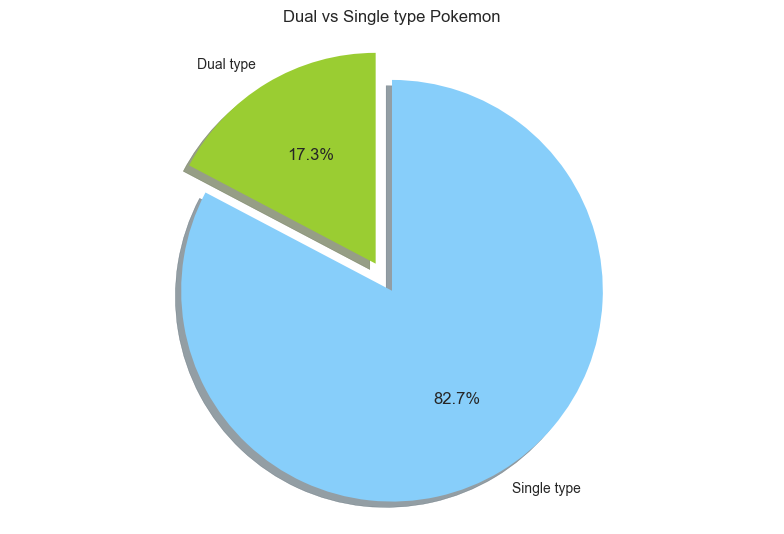

In [408]:
data = [len(single_type_pokemon), len(dual_type_pokemon)]
colors = ['yellowgreen', 'lightskyblue']

plt.pie(data,
        labels= ['Dual type', 'Single type'],
        shadow=True,
        colors=colors,
        explode=(0, 0.15),
        startangle=90,
        autopct='%1.1f%%')

plt.axis('equal')
plt.title('Dual vs Single type Pokemon')
plt.tight_layout()
plt.show()

In [409]:
pokemon["Type 2"] = pokemon["Type 2"].fillna("No Type").replace(" ", "No Type")
leggendari_monotipo = pokemon[(pokemon["Legendary"] == True) & (pokemon["Type 2"] == "No Type")]
print(f"Numero di Pokémon leggendari con un solo tipo: {len(leggendari_monotipo)}")
leggendari_monotipo = pokemon[(pokemon["Legendary"] == False) & (pokemon["Type 2"] == "No Type")]
print(f"Numero di Pokémon non leggendari con un solo tipo: {len(leggendari_monotipo)}")


Numero di Pokémon leggendari con un solo tipo: 42
Numero di Pokémon non leggendari con un solo tipo: 504


['Poison' 'No Type' 'Flying' 'Ground' 'Fairy' 'Grass' 'Fighting' 'Psychic'
 'Steel' 'Ice' 'Rock' 'Water' 'Electric' 'Fire' 'Dragon' 'Dark' 'Ghost'
 'Bug' 'Normal']


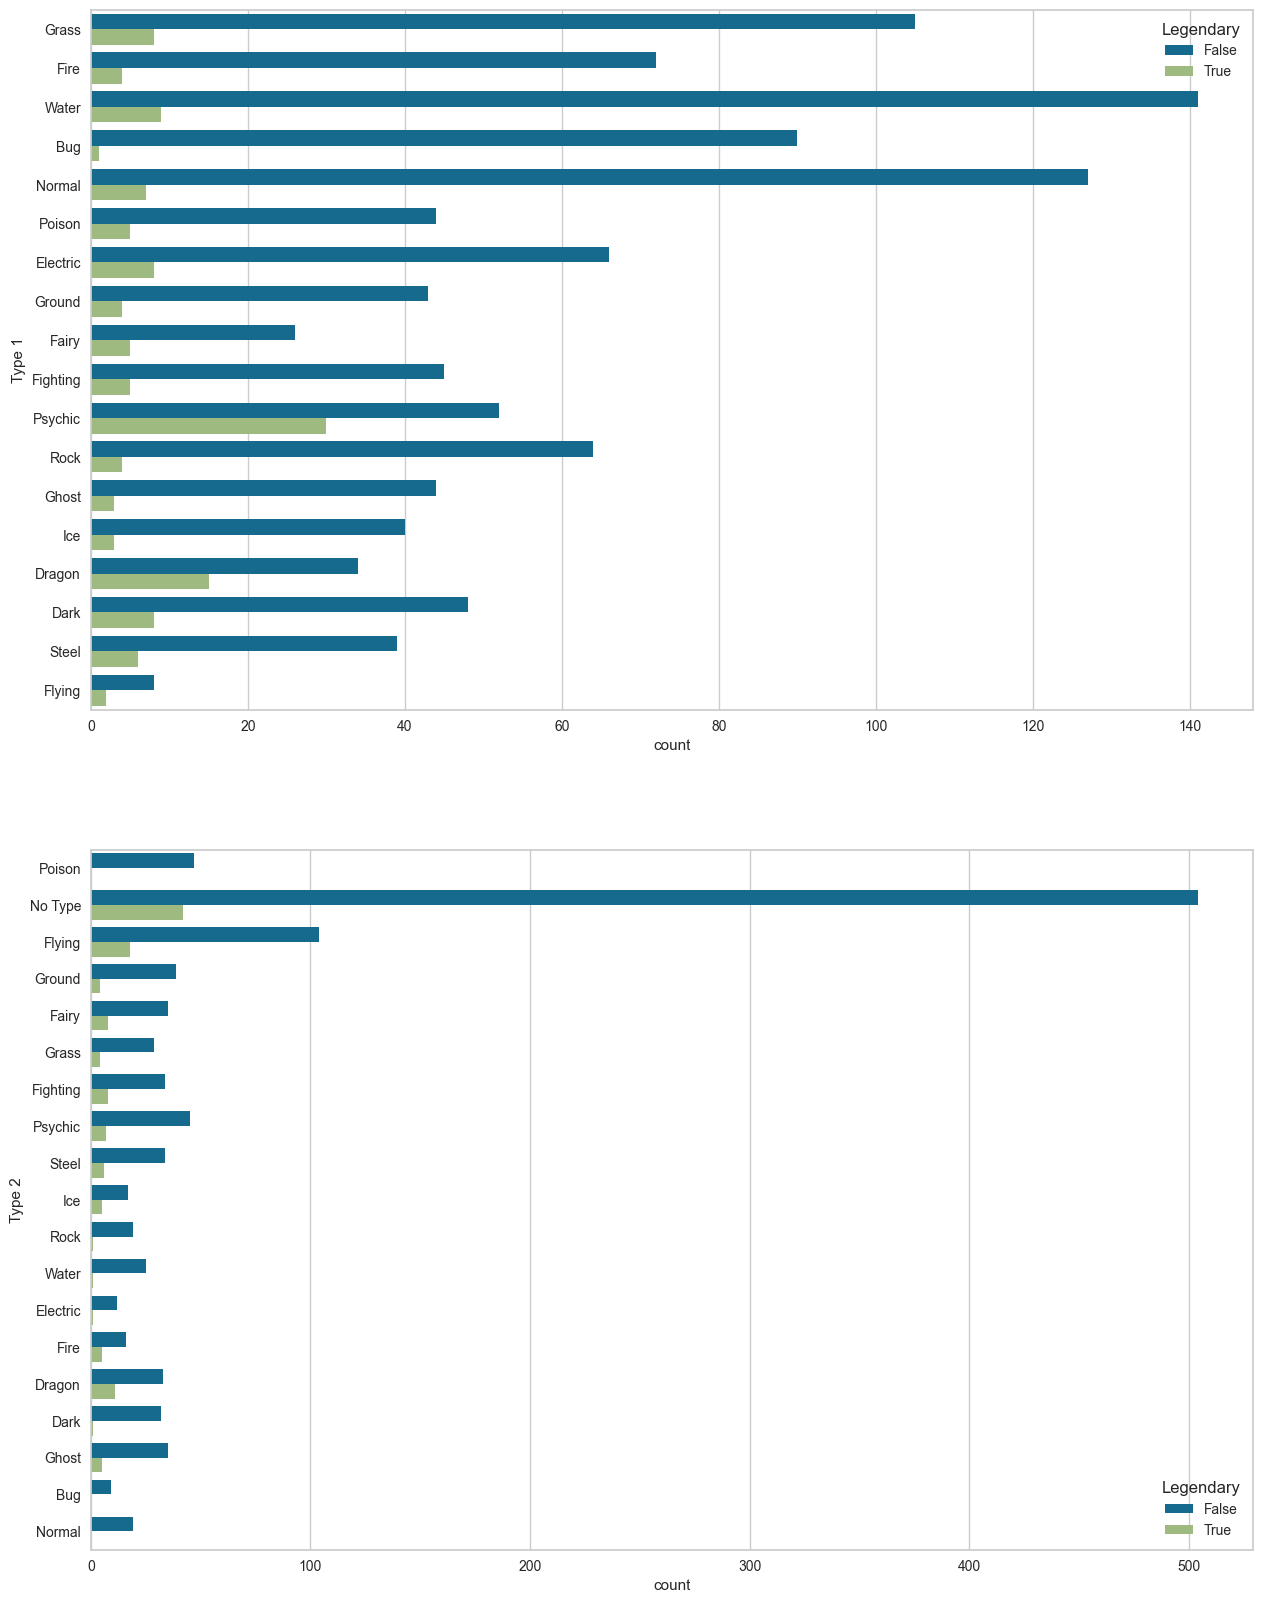

In [410]:
categorical = pokemon[["Type 1", "Type 2", "Legendary"]]
pokemon["Type 2"] = pokemon["Type 2"].fillna("No Type")
pokemon["Type 2"] = pokemon["Type 2"].replace(" ", "No Type")
print(categorical["Type 2"].unique())
fig, axes = plt.subplots(2, figsize=(15,20))
b = 0
for col in categorical.columns:
    if col == "Legendary":
        break
    sns.countplot(y=categorical[col], hue="Legendary", data=categorical, ax=axes[b])
    b += 1

In [411]:
pokemon['Legendary'].value_counts()

Legendary
False    1088
True      127
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Legendary'>

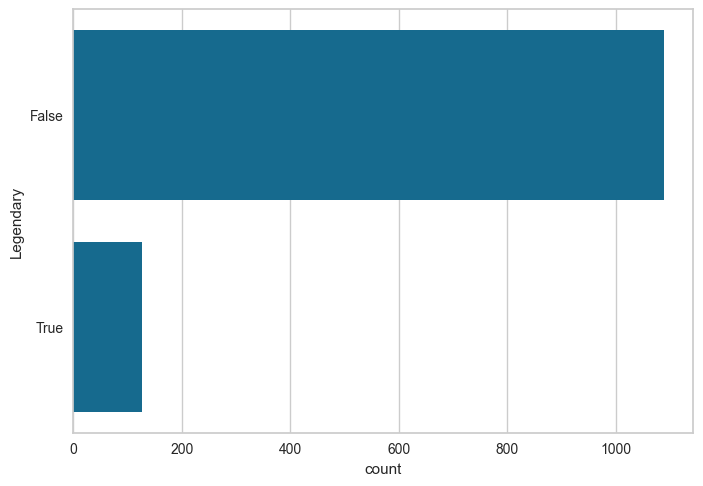

In [412]:
sns.countplot(data = pokemon , y = 'Legendary')

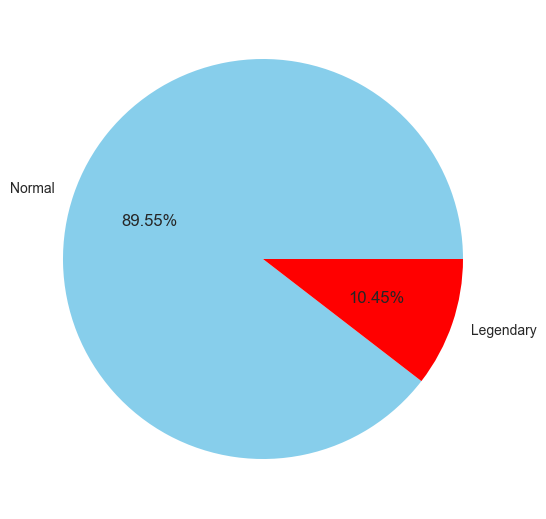

In [413]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Leg = pokemon['Legendary'].value_counts()
labels = ['Normal', 'Legendary']
ax.pie(Leg, labels = labels,autopct='%1.2f%%',colors=['skyblue','red'])
plt.show()

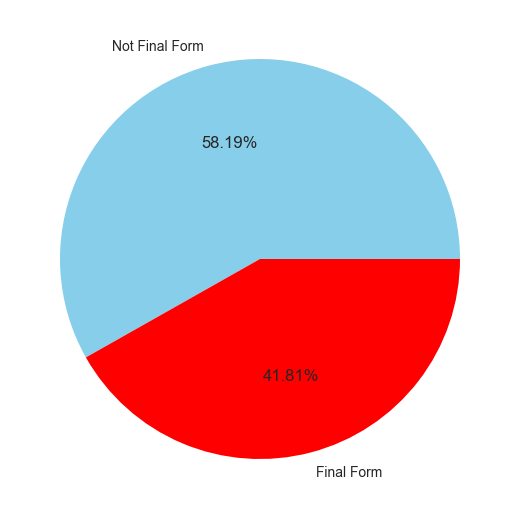

In [414]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Leg = pokemon['Final Form'].value_counts()
labels = ['Not Final Form', 'Final Form']
ax.pie(Leg, labels = labels,autopct='%1.2f%%',colors=['skyblue','red'])
plt.show()

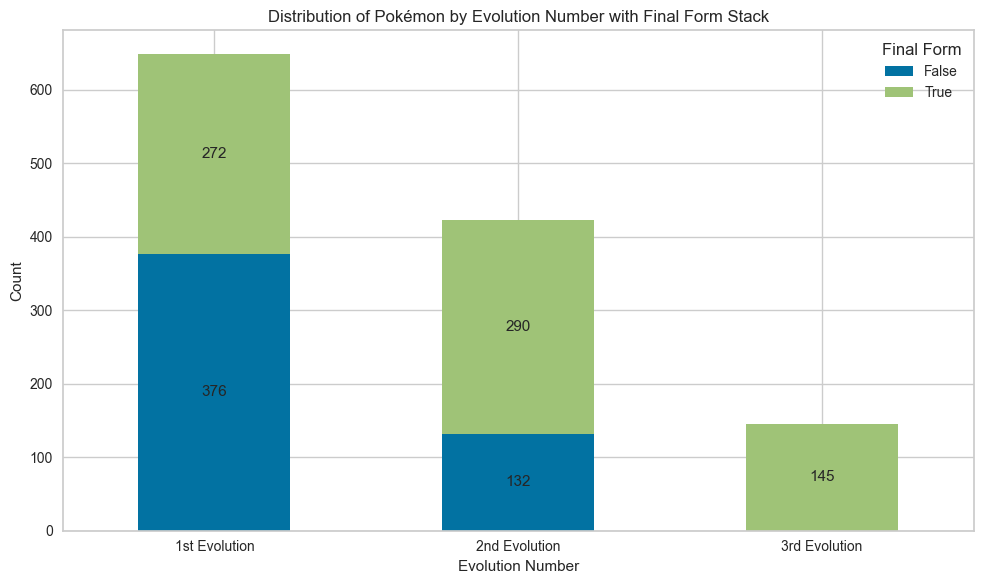

In [ ]:
counts = pokemon.groupby(['Evolution Number', 'Final Form']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
counts.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Distribution of Pokémon by Evolution Number with Final Form Stack')
ax.set_xlabel('Evolution Number')
ax.set_ylabel('Count')
ax.set_xticklabels(['1st Evolution', '2nd Evolution', '3rd Evolution'], rotation=0)
for i, (evo, row) in enumerate(counts.iterrows()):
    non_final = row.get(False, 0)
    final = row.get(True, 0)
    if non_final > 0:
        ax.text(i, non_final / 2, str(non_final), ha='center', va='center', fontsize=11)
    if final > 0:
        ax.text(i, non_final + final / 2, str(final), ha='center', va='center', fontsize=11)
ax.legend(title='Final Form', loc='upper right')
plt.tight_layout()
plt.show()

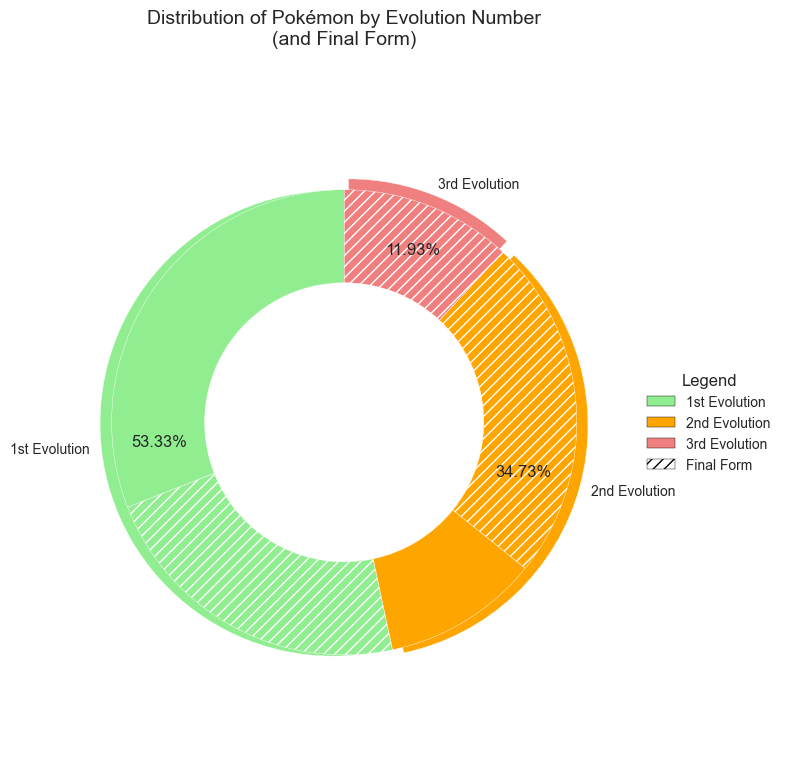

In [ ]:
from matplotlib.patches import Patch

evolution_counts = pokemon['Evolution Number'].value_counts().sort_index()
evo_final = (
    pokemon
    .groupby(['Evolution Number', 'Final Form'])
    .size()
    .unstack(fill_value=0)
)
evo_final = evo_final.reindex(columns=[False, True], fill_value=0).sort_index()

base_labels = ['1st Evolution', '2nd Evolution', '3rd Evolution']
base_colors = ['lightgreen', 'orange', 'lightcoral']
explode = (0.05, 0.05, 0.05)

fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('equal')
wedges_inner, texts_inner, autotexts_inner = ax.pie(
    evolution_counts.values,
    labels=base_labels,
    autopct='%1.2f%%',
    pctdistance=0.75,
    labeldistance=1.05,
    startangle=90,
    colors=base_colors,
    explode=explode,
    wedgeprops=dict(width=0.4, edgecolor='white')
)

sizes_outer = []
colors_outer = []
hatches_outer = []
for idx, color in zip(evo_final.index, base_colors):
    nf = evo_final.loc[idx, False]
    f  = evo_final.loc[idx, True]
    sizes_outer += [nf, f]
    colors_outer += [color, color]
    hatches_outer += ['', '///']

wedges_outer = ax.pie(
    sizes_outer,
    labels=None,
    startangle=90,
    radius=1.0,
    colors=colors_outer,
    wedgeprops=dict(width=0.4, edgecolor='white')
)[0]

for wedge, hatch in zip(wedges_outer, hatches_outer):
    wedge.set_hatch(hatch)

legend_handles = []
for color, label in zip(base_colors, base_labels):
    legend_handles.append(Patch(facecolor=color, edgecolor='black', label=label))
legend_handles.append(Patch(facecolor='white', edgecolor='black', hatch='///', label='Final Form'))

ax.legend(
    handles=legend_handles,
    loc='center left',
    bbox_to_anchor=(1.0, 0.5),
    title="Legend"
)

plt.title('Distribution of Pokémon by Evolution Number\n(and Final Form)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


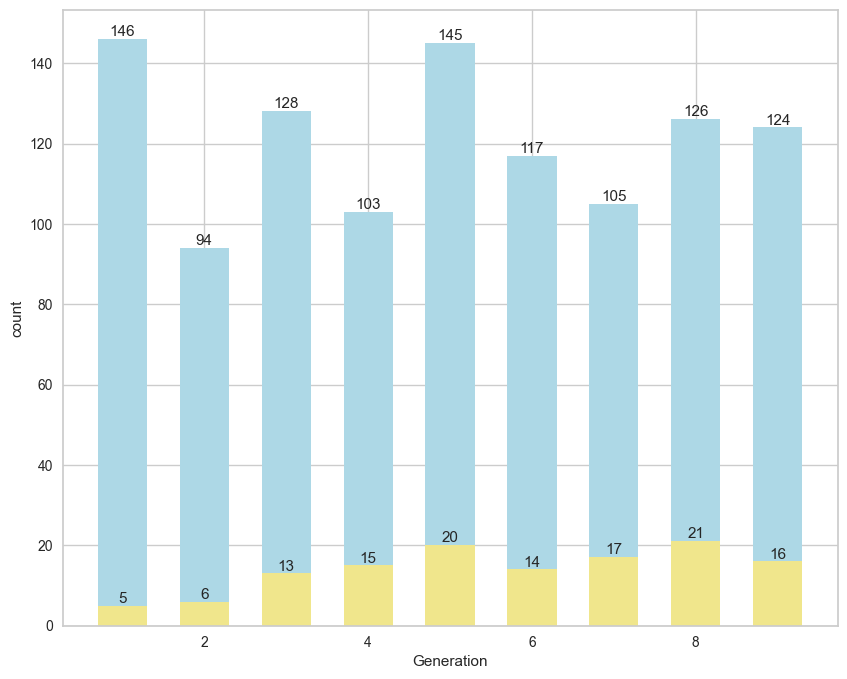

In [417]:
genl = pokemon.reset_index().groupby(["Generation", "Legendary"]).aggregate({"Name": "count"})
genl = genl.reset_index().rename(columns={'Name': 'count'})

plt.figure(figsize=(10, 8))
colors = ['lightblue', 'khaki']
plt.bar(genl["Generation"], genl["count"], color=colors, width=0.6)
plt.ylabel("count")
plt.xlabel("Generation")
for a, b in zip(genl["Generation"], genl["count"]):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va='bottom', fontsize=11)

plt.show()

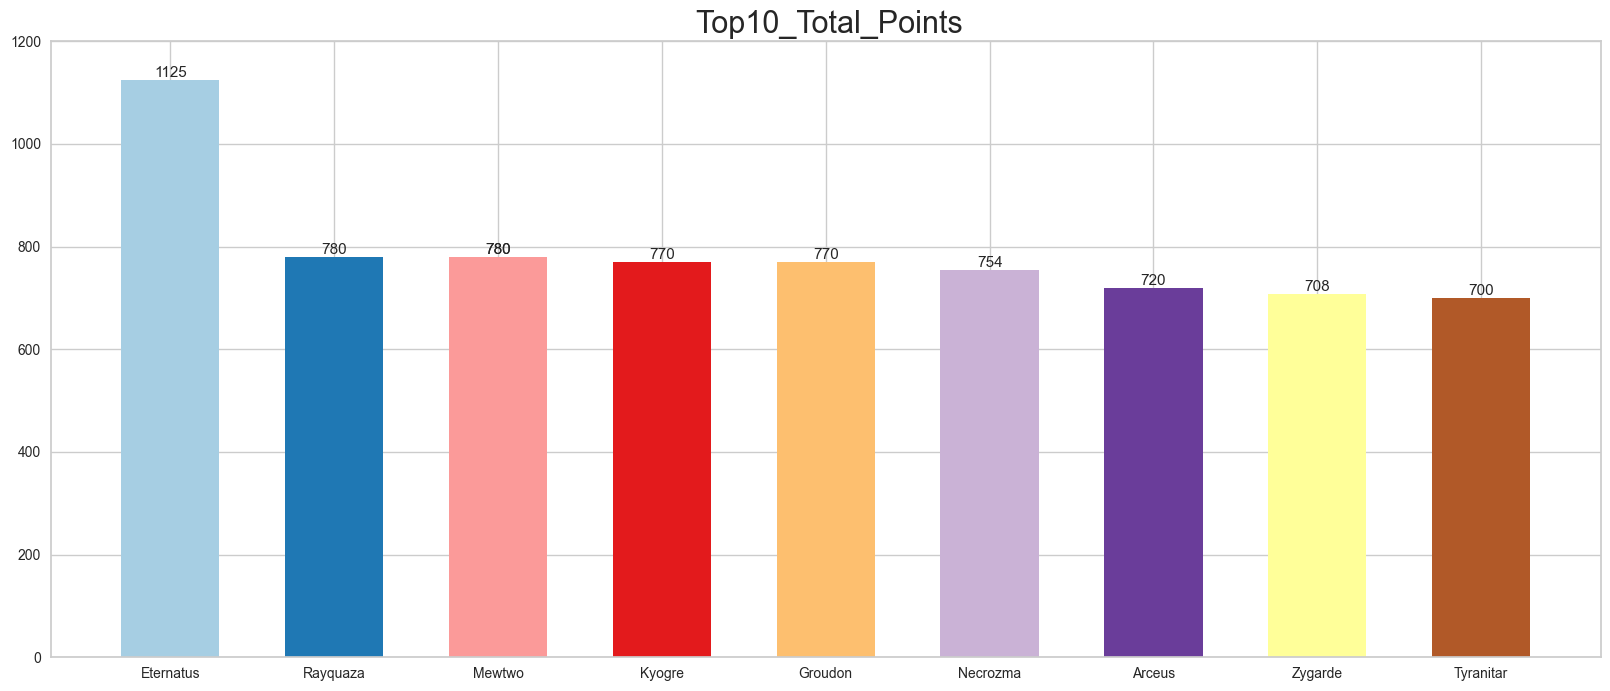

In [418]:
from matplotlib import cm
pokemon['Name'] = pokemon['Name'].str.replace(' ', '\n')
plt.figure(figsize=(20, 8))
total = pokemon[["Total", "Name"]].sort_values('Total', ascending=False).reset_index()
colors = cm.Paired(np.linspace(0, 1, 10))
plt.bar(total["Name"].head(10), total["Total"].head(10), color=colors, width=0.6)

for a, b in zip(total["Name"].head(10), total["Total"].head(10)): 
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va='bottom', fontsize=11)
plt.ylim(0, 1200)
plt.title(label=" Top10_Total_Points", loc="center", fontsize=22)

plt.show()

In [419]:
from sklearn.preprocessing import LabelEncoder  #For convert categorical feature into number
le = LabelEncoder()
pokemon["Type 1"] = le.fit_transform(pokemon["Type 1"])
pokemon["Type 2"] = le.fit_transform(pokemon["Type 2"])
pokemon.head()

,ID,Name,Form,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution Number,Final Form
0,1,Bulbasaur,NaN,9,14,318,45,49,49,65,65,45,1,False,1,False
1,2,Ivysaur,NaN,9,14,405,60,62,63,80,80,60,1,False,2,False
2,3,Venusaur,NaN,9,14,525,80,82,83,100,100,80,1,False,3,True
3,4,Charmander,NaN,6,12,309,39,52,43,60,50,65,1,False,1,False
4,5,Charmeleon,NaN,6,12,405,58,64,58,80,65,80,1,False,2,False


In [420]:
pokemon['Type 1'] = pokemon['Type 1'].astype(int)
pokemon['Type 2'] = pokemon['Type 2'].astype(int)

print("Data types after conversion:")
print(f"Type 1: {pokemon['Type 1'].dtype}")
print(f"Type 2: {pokemon['Type 2'].dtype}")
print(f"Shape: {pokemon.shape}")

Data types after conversion:
Type 1: int64
Type 2: int64
Shape: (1215, 16)


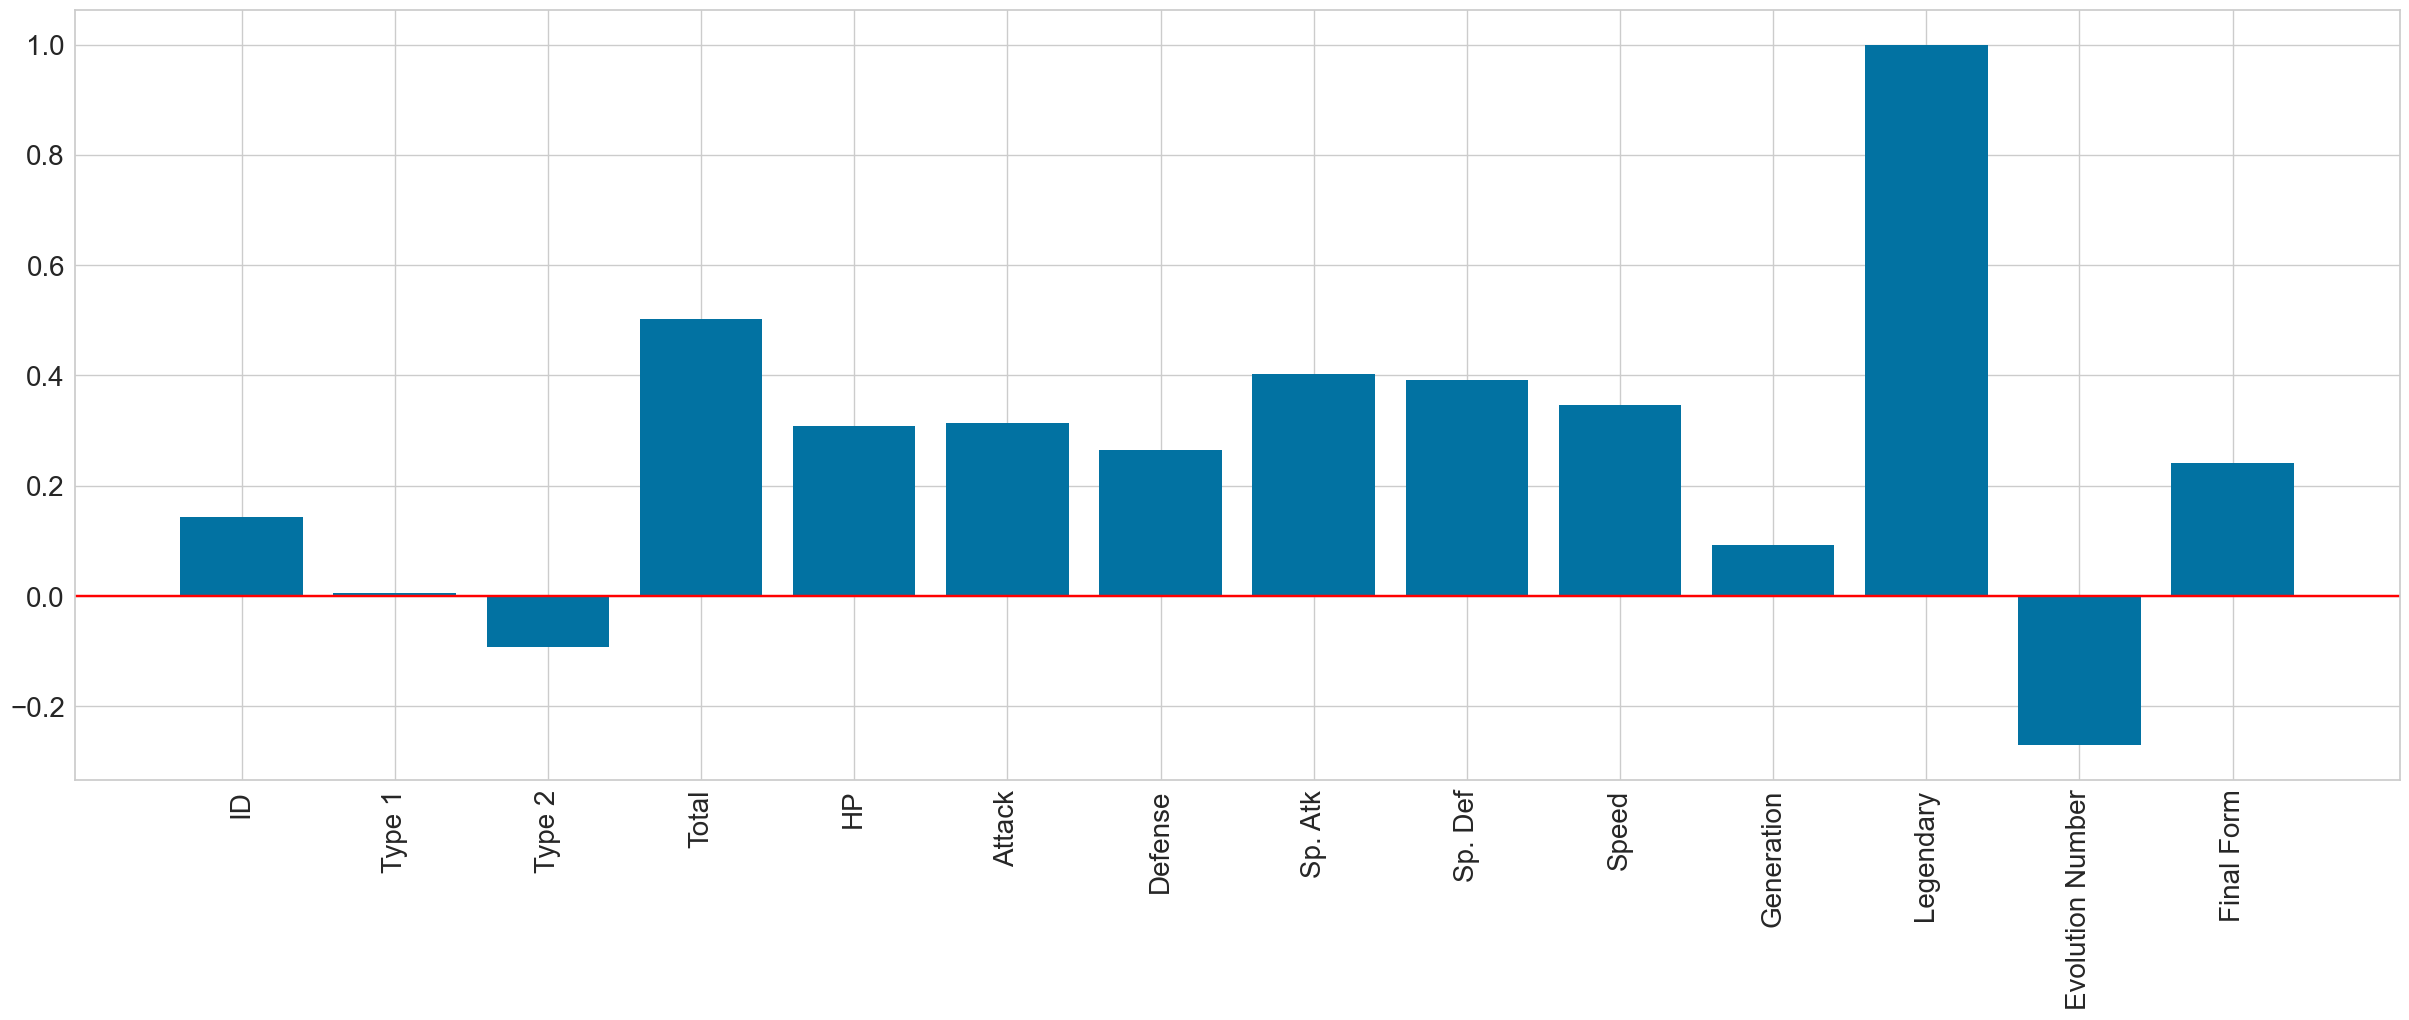

In [421]:
plt.figure(figsize=(30,10))
plt.axhline(y=0, c="red")
plt.bar(x = pokemon.corr(numeric_only=True)['Legendary'].index,height=pokemon.corr(numeric_only=True)['Legendary'])
plt.xticks(rotation=90)
plt.tick_params(labelsize=20)
plt.show()

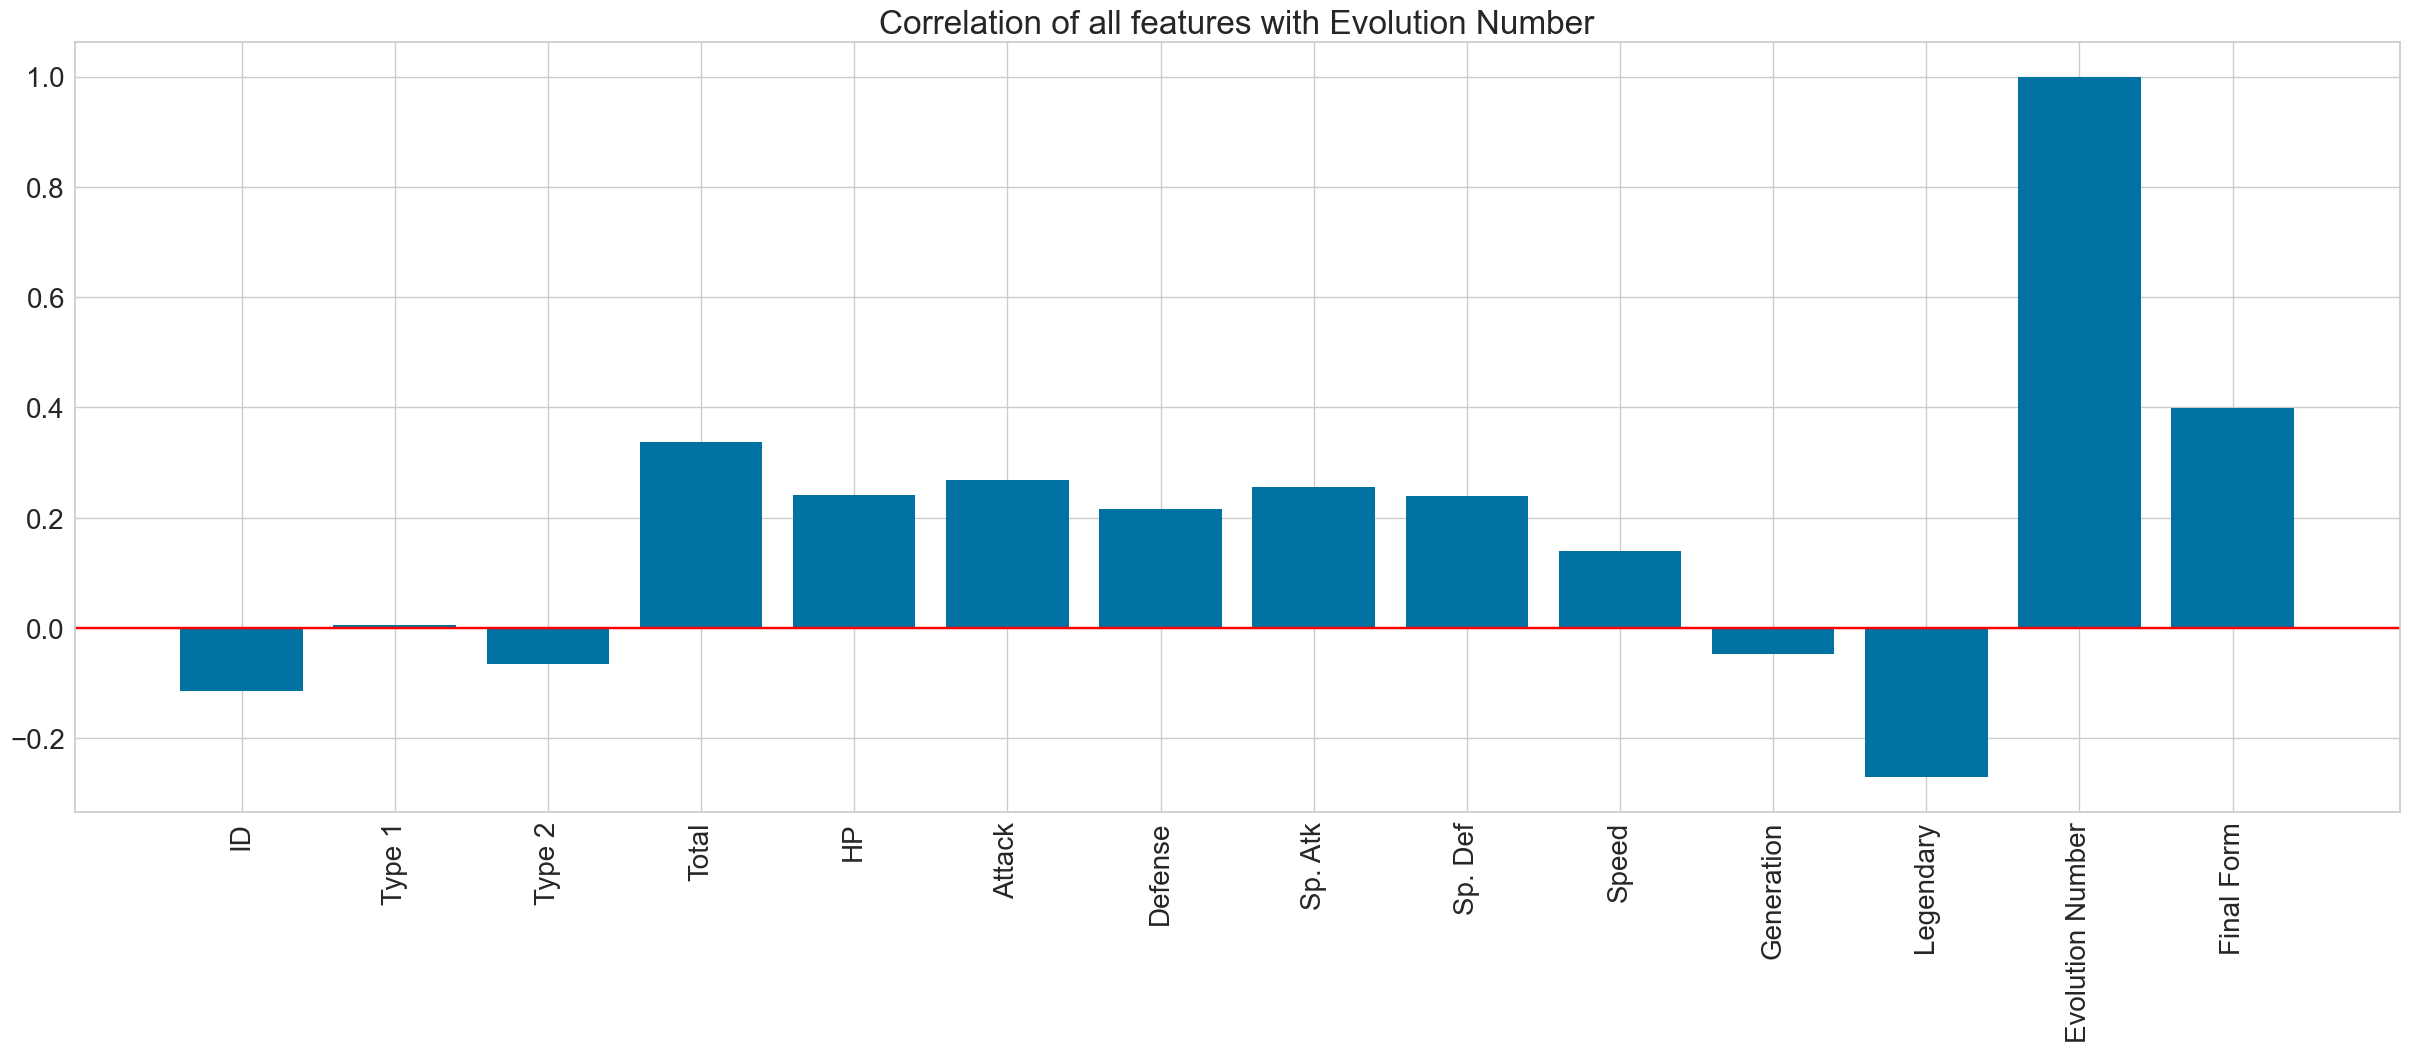

In [422]:
plt.figure(figsize=(30,10))
plt.axhline(y=0, c="red")
plt.bar(x = pokemon.corr(numeric_only=True)['Evolution Number'].index,height=pokemon.corr(numeric_only=True)['Evolution Number'])
plt.xticks(rotation=90)
plt.tick_params(labelsize=20)
plt.title('Correlation of all features with Evolution Number', fontsize=24)
plt.show()

In [423]:
pokemon["Legendary"] = [1 if x == True else 0 for x in pokemon["Legendary"]]
pokemon["Final Form"] = [1 if x == True else 0 for x in pokemon["Final Form"]]

print("Boolean to integer conversion completed:")
print(f"Legendary unique values: {pokemon['Legendary'].unique()}")
print(f"Final Form unique values: {pokemon['Final Form'].unique()}")
print(f"Legendary data type: {pokemon['Legendary'].dtype}")
print(f"Final Form data type: {pokemon['Final Form'].dtype}")

Boolean to integer conversion completed:
Legendary unique values: [0 1]
Final Form unique values: [0 1]
Legendary data type: int64
Final Form data type: int64


In [424]:
legendary_count = pokemon['Legendary'].sum()
non_legendary_count = len(pokemon) - legendary_count

print(f'Number of legendary Pokémon: {legendary_count}')
print(f'Number of non legendary Pokémon: {non_legendary_count}')

Number of legendary Pokémon: 127
Number of non legendary Pokémon: 1088


In [425]:
n_legendary_to_add = non_legendary_count - legendary_count

print(f"Number of legendary Pokémon to add for balancing: {n_legendary_to_add}")

Number of legendary Pokémon to add for balancing: 961


In [426]:
min_max_values = pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].agg(['min', 'max'])
print(min_max_values)

      HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
min    1       5        5       10       20      5
max  255     190      250      194      250    200


In [427]:
new_legendary_pokemon = pd.DataFrame({
    'Type 1': np.random.choice(pokemon['Type 1'].unique(), n_legendary_to_add),
    'Type 2': np.random.choice(pokemon['Type 2'].unique(), n_legendary_to_add),
    'HP': np.random.randint(1, 256, n_legendary_to_add),
    'Attack': np.random.randint(5, 191, n_legendary_to_add),
    'Defense': np.random.randint(5, 251, n_legendary_to_add),
    'Sp. Atk': np.random.randint(10, 195, n_legendary_to_add),
    'Sp. Def': np.random.randint(20, 251, n_legendary_to_add),
    'Speed': np.random.randint(5, 201, n_legendary_to_add),
    'Generation': np.random.randint(1, 10, n_legendary_to_add),
    'Legendary': [True] * n_legendary_to_add,
    'Evolution Number': np.random.randint(1, 4, n_legendary_to_add),
    'Final Form': [np.random.choice([True, False], p=[0.3, 0.7]) for _ in range(n_legendary_to_add)]
})

new_legendary_pokemon.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution Number,Final Form
0,3,10,91,21,110,116,167,38,5,True,1,False
1,2,4,130,73,12,105,44,93,6,True,2,False
2,14,6,163,112,226,100,89,129,2,True,1,False
3,10,1,210,143,100,167,82,49,5,True,3,False
4,3,0,206,98,232,139,183,138,7,True,3,False


In [428]:
new_legendary_pokemon['Total'] = (
    new_legendary_pokemon['HP'] +
    new_legendary_pokemon['Attack'] +
    new_legendary_pokemon['Defense'] +
    new_legendary_pokemon['Sp. Atk'] +
    new_legendary_pokemon['Sp. Def'] +
    new_legendary_pokemon['Speed'] +
    new_legendary_pokemon['Evolution Number']
)
new_legendary_pokemon.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution Number,Final Form,Total
0,3,10,91,21,110,116,167,38,5,True,1,False,544
1,2,4,130,73,12,105,44,93,6,True,2,False,459
2,14,6,163,112,226,100,89,129,2,True,1,False,820
3,10,1,210,143,100,167,82,49,5,True,3,False,754
4,3,0,206,98,232,139,183,138,7,True,3,False,999


In [429]:
pokemon = pd.concat([pokemon, new_legendary_pokemon], ignore_index=True)
legendary_count_extended = pokemon['Legendary'].sum()
print(f'Numero totale di Pokémon leggendari dopo l aggiunta: {legendary_count_extended}')

Numero totale di Pokémon leggendari dopo l aggiunta: 1088


In [430]:
legendary_count = pokemon['Legendary'].sum()
non_legendary_count = len(pokemon) - legendary_count

print(f'Legendary pokemon: {legendary_count}')
print(f'Non leggendary pokemon: {non_legendary_count}')

Legendary pokemon: 1088
Non leggendary pokemon: 1088


# 3 - MODELLING: IS LEGENDARY?

In [431]:
legendary = pokemon['Legendary']
X = pokemon.drop(['ID','Name','Legendary', 'Form'],axis=1)
y = legendary

In [432]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34, train_size=0.66, random_state = 7)

In [433]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [434]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
def plot_confusion_matrix(y_test, y_pred):
    group_names = ['True Neg','False Neg','False Pos','True Pos']
    conf_mat = confusion_matrix(y_test, y_pred)
    conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
    labels = [f"{v1}\n{v2:.2f}" for v1, v2 in zip(group_names, conf_mat_normalized.flatten())]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

In [435]:
from yellowbrick.model_selection import FeatureImportances
def features_importances(model,X,y):
    viz = FeatureImportances(model)
    viz.fit(X, y)
    viz.show()

In [436]:
def plot_roc_curve(y_test, test_prediction):
    fpr, tpr, _ = roc_curve(y_test, test_prediction)
    roc_auc = auc(fpr, tpr) 
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

## 3.1 - DECISION TREE 

In [437]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

decisionTree = DecisionTreeClassifier()
decisionTree = decisionTree.fit(X_train,y_train)

In [438]:
test_predictionDt = decisionTree.predict(X_test)
train_predictionDt = decisionTree.predict(X_train)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predictionDt))
print("Training accuracy:",metrics.accuracy_score(y_train, train_predictionDt))

Testing accuracy: 0.9175675675675675
Training accuracy: 1.0


In [439]:
report = classification_report(y_test, test_predictionDt)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       374
           1       0.93      0.90      0.92       366

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



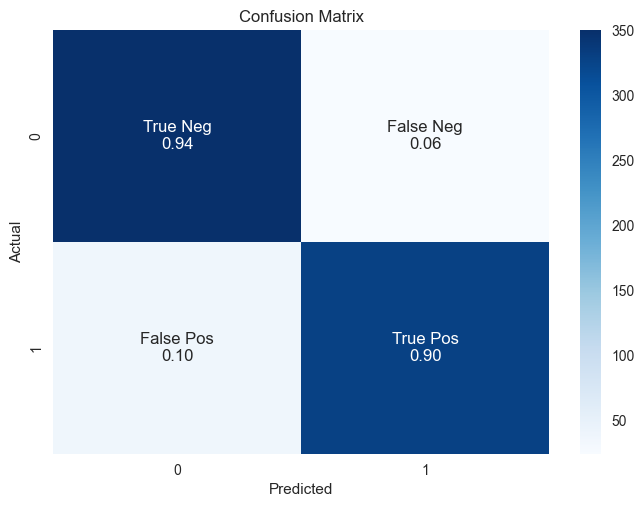

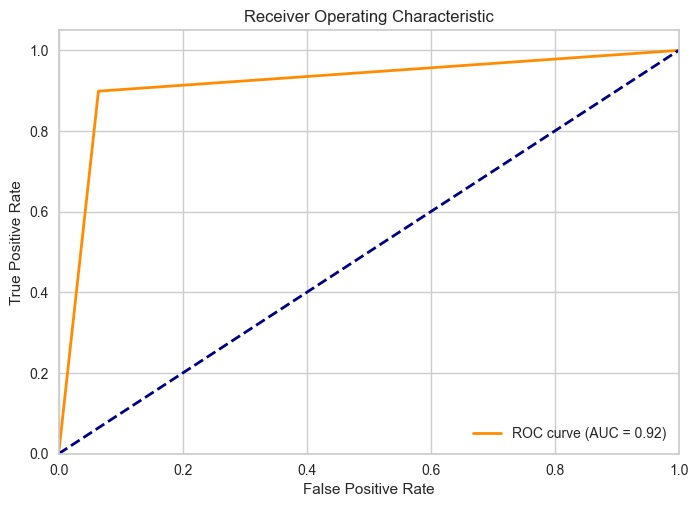

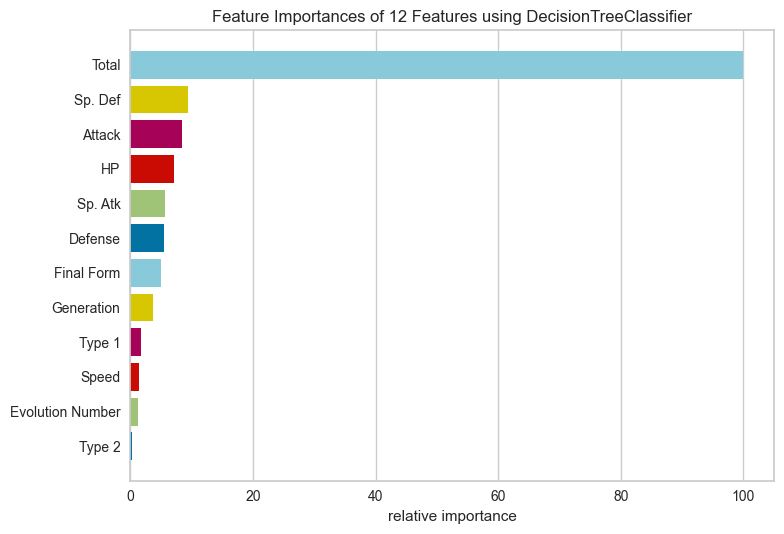

In [440]:
plot_confusion_matrix(y_test, test_predictionDt)
plot_roc_curve(y_test, test_predictionDt)
features_importances(decisionTree,X_test,y_test)

## 3.2 - DECISION TREE WITH HYPERPARAMETERS

In [441]:
parametri = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

decisionTree = decisionTree.fit(X_train,y_train)
grid_search = GridSearchCV(estimator=decisionTree, param_grid=parametri, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Migliori parametri:", grid_search.best_params_)

Migliori parametri: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [442]:
decisionTreeParameter = DecisionTreeClassifier(**grid_search.best_params_)
decisionTreeParameter = decisionTreeParameter.fit(X_train,y_train)

In [443]:
test_predictionDtP = decisionTreeParameter.predict(X_test)
train_predictionDtP = decisionTreeParameter.predict(X_train)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predictionDtP))
print("Training accuracy:",metrics.accuracy_score(y_train, train_predictionDtP))

Testing accuracy: 0.922972972972973
Training accuracy: 1.0


In [444]:
report = classification_report(y_test, test_predictionDtP)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       374
           1       0.93      0.92      0.92       366

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



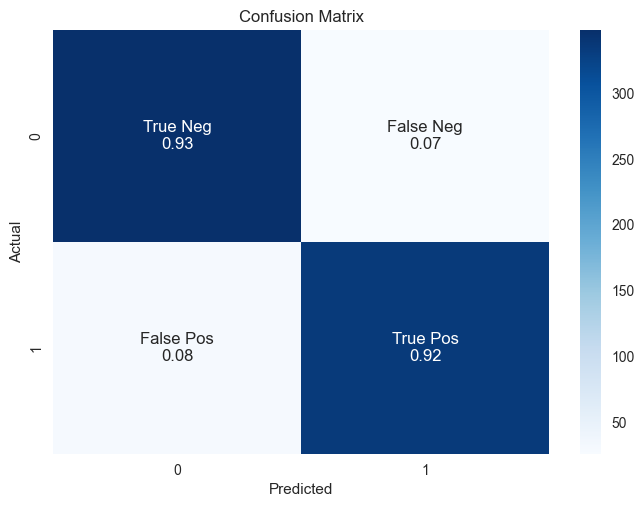

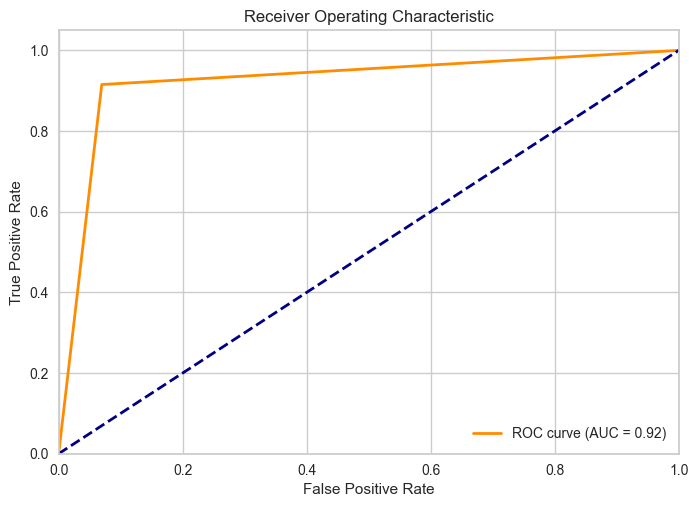

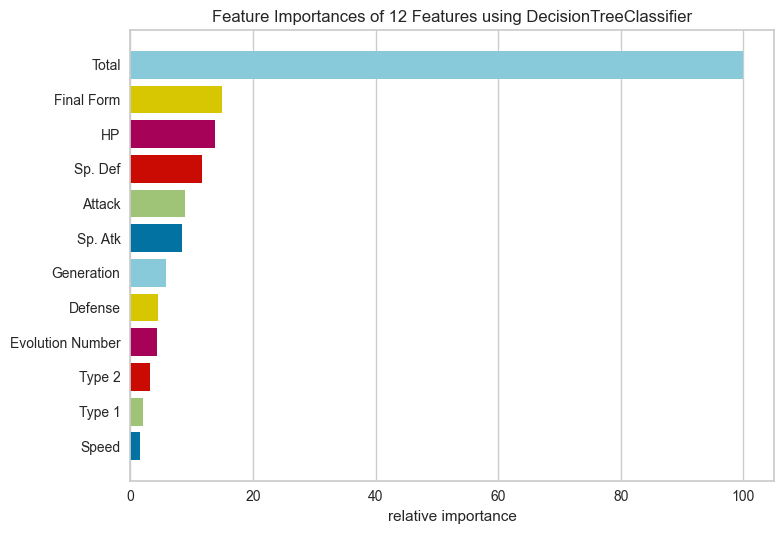

In [445]:
plot_confusion_matrix(y_test, test_predictionDtP)
plot_roc_curve(y_test, test_predictionDtP)
features_importances(decisionTreeParameter,X_test,y_test)

## 3.3 - RANDOM FOREST

In [446]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train,y_train)
print("Random Forest model trained successfully!")
print(f"Default parameters used")

Random Forest model trained successfully!
Default parameters used


In [447]:
test_predictionRf = rfc.predict(X_test)
train_predictionRf = rfc.predict(X_train)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predictionRf))
print("Training accuracy:",metrics.accuracy_score(y_train, train_predictionRf))

Testing accuracy: 0.9527027027027027
Training accuracy: 1.0


In [448]:
print(classification_report(y_test, test_predictionRf))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       374
           1       0.95      0.96      0.95       366

    accuracy                           0.95       740
   macro avg       0.95      0.95      0.95       740
weighted avg       0.95      0.95      0.95       740



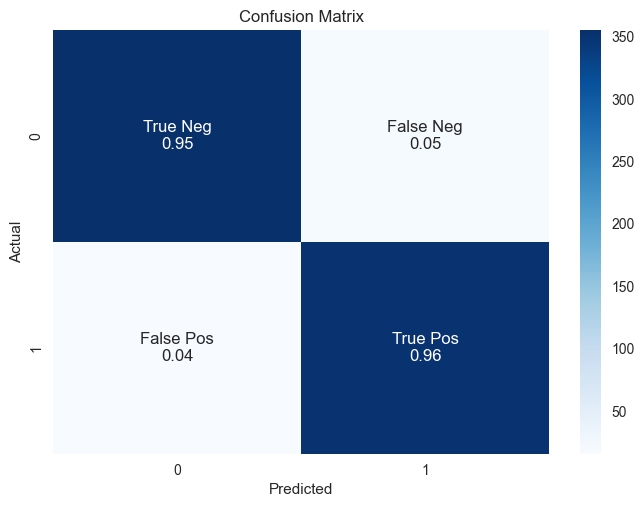

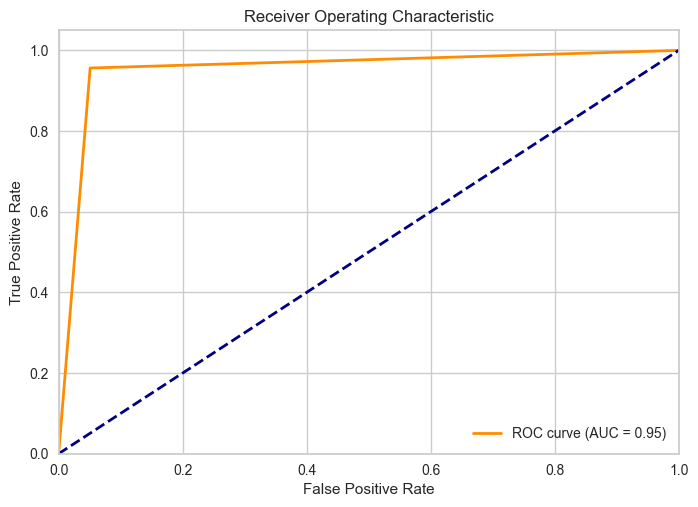

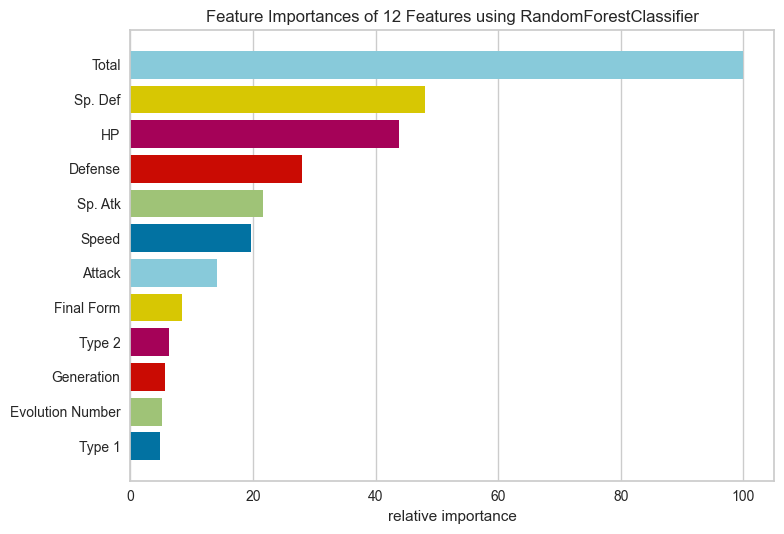

In [449]:
plot_confusion_matrix(y_test, test_predictionRf)
plot_roc_curve(y_test, test_predictionRf)
features_importances(rfc,X_test,y_test)

## 3.4 - RANDOM FOREST WITH HYPERPARAMETERS

In [450]:
#lentissimo
parametri = {
  'n_estimators': [50, 70, 80],
  'max_features': ['sqrt', 'log2', None],
  'max_depth': [10, 30, None],
  'min_samples_split': [1, 2, 4],
  'min_samples_leaf': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=rfc, param_grid=parametri, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Migliori parametri:", grid_search.best_params_)

Migliori parametri: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}


In [ ]:
rfcParameter = RandomForestClassifier(**grid_search.best_params_)
rfcParameter.fit(X_train,y_train)
print("Random Forest with hyperparameters trained successfully!")

Random Forest with hyperparameters trained successfully!
Model parameters: n_estimators=80, max_depth=30, max_features='log2'


In [452]:
test_predictionRfP = rfcParameter.predict(X_test)
train_predictionRfP = rfcParameter.predict(X_train)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predictionRfP))
print("Training accuracy:",metrics.accuracy_score(y_train, train_predictionRfP))

Testing accuracy: 0.9378378378378378
Training accuracy: 1.0


In [453]:
print(classification_report(y_test, test_predictionRfP))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       374
           1       0.94      0.93      0.94       366

    accuracy                           0.94       740
   macro avg       0.94      0.94      0.94       740
weighted avg       0.94      0.94      0.94       740



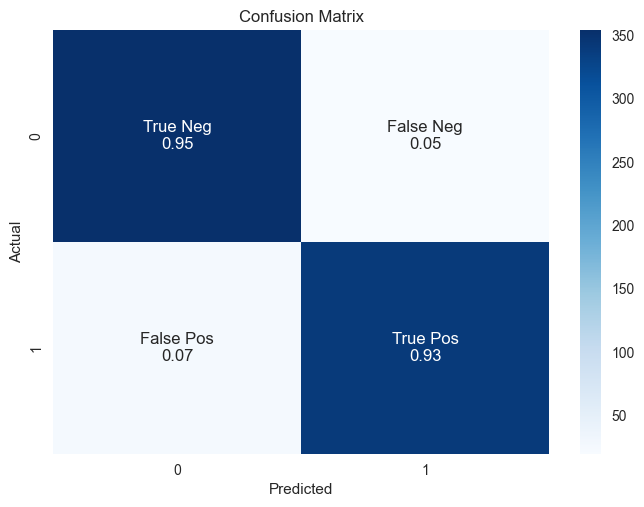

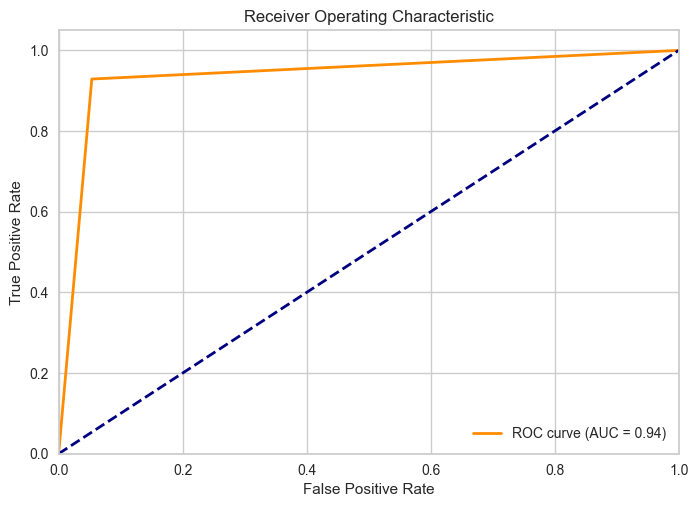

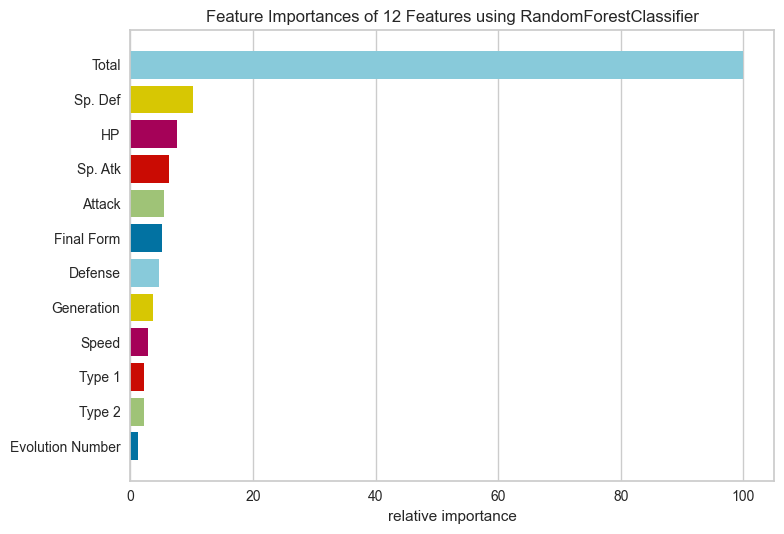

In [454]:
plot_confusion_matrix(y_test, test_predictionRfP)
plot_roc_curve(y_test, test_predictionRfP)
features_importances(rfcParameter,X_test,y_test)

## 3.5 - LOGISTIC REGRESSION

In [455]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [456]:
test_predictionLr = lr.predict(X_test)
train_predictionLr = lr.predict(X_train)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predictionLr))
print("Training accuracy:",metrics.accuracy_score(y_train, train_predictionLr))

Testing accuracy: 0.9148648648648648
Training accuracy: 0.915041782729805


In [457]:
print(classification_report(y_test, test_predictionLr))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       374
           1       0.94      0.89      0.91       366

    accuracy                           0.91       740
   macro avg       0.92      0.91      0.91       740
weighted avg       0.92      0.91      0.91       740



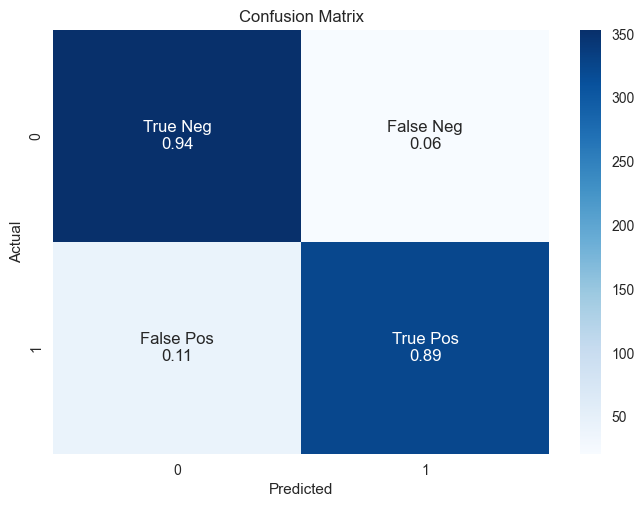

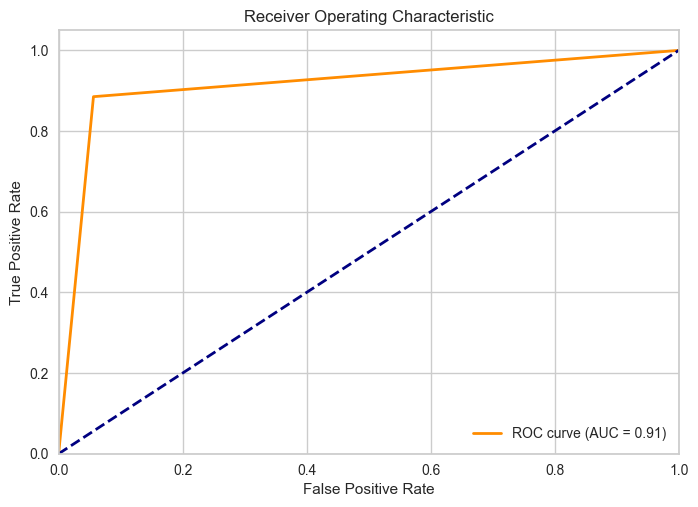

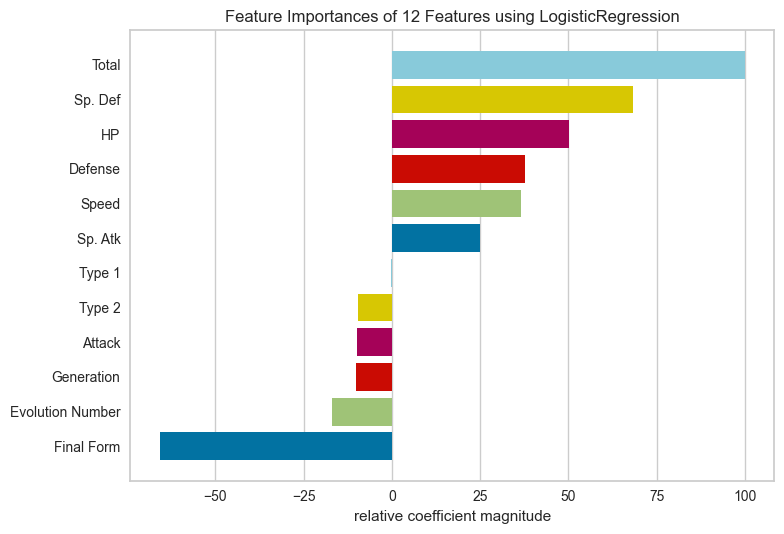

In [458]:
plot_confusion_matrix(y_test, test_predictionLr)
plot_roc_curve(y_test, test_predictionLr)
features_importances(lr,X_test,y_test)

## 3.6 - LOGISTIC REGRESSION WITH HYPERPARAMETERS

In [459]:
parametri = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=lr, param_grid=parametri, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Migliori parametri:", grid_search.best_params_)

Migliori parametri: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [460]:
lrParameter = LogisticRegression(**grid_search.best_params_)
lrParameter.fit(X_train,y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [461]:
test_predictionLrP = lrParameter.predict(X_test)
train_predictionLrP = lrParameter.predict(X_train)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predictionLrP))
print("Training accuracy:",metrics.accuracy_score(y_train, train_predictionLrP))

Testing accuracy: 0.9472972972972973
Training accuracy: 0.9519498607242339


In [ ]:
print(classification_report(y_test, test_predictionLrP))
#from sklearn.metrics import classification_report, accuracy_score

#report_dict = classification_report(y_test, test_predictionLrP, output_dict=True)
#report_df = pd.DataFrame(report_dict).transpose()
#acc = accuracy_score(y_test, test_predictionLrP)
#report_df.loc['accuracy', ['precision', 'recall']] = acc
#report_df['support'] = report_df['support'].astype(int)
#report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']].round(2)
#print(report_df)

              precision  recall  f1-score  support
0                  0.93    0.97      0.95      374
1                  0.97    0.93      0.95      366
accuracy           0.95    0.95      0.95        0
macro avg          0.95    0.95      0.95      740
weighted avg       0.95    0.95      0.95      740


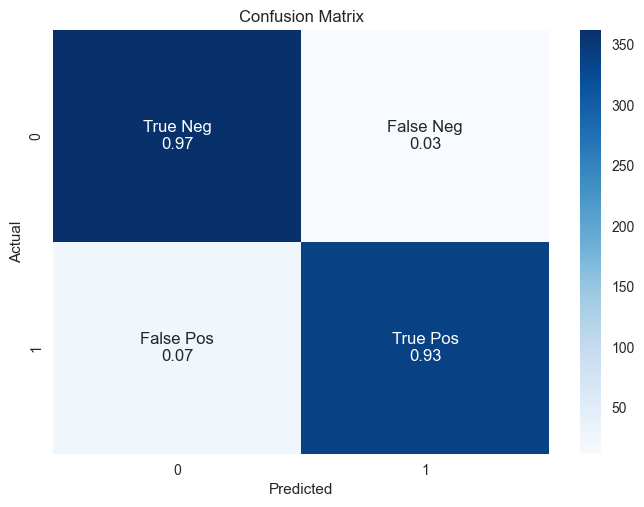

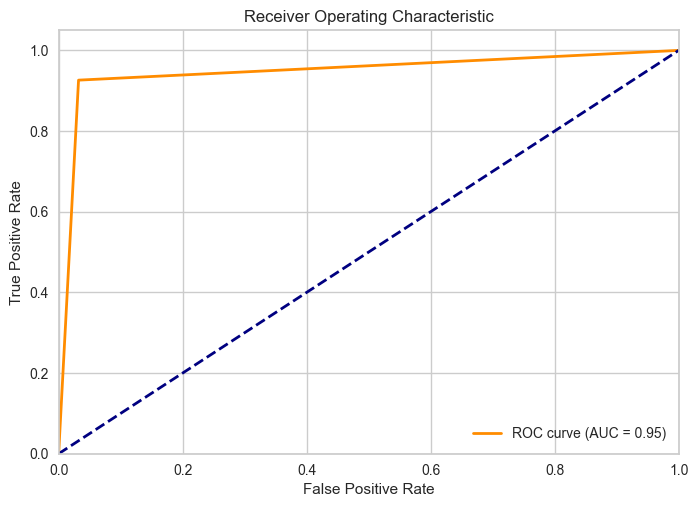

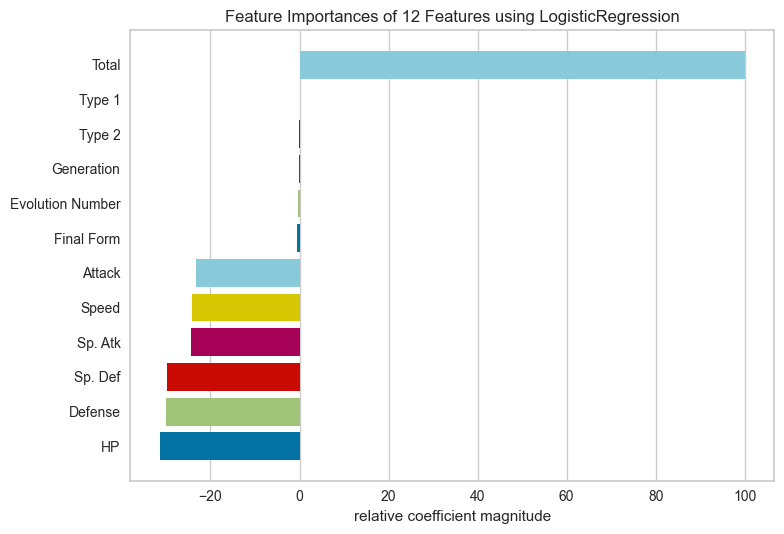

In [463]:
plot_confusion_matrix(y_test, test_predictionLrP)
plot_roc_curve(y_test, test_predictionLrP)
features_importances(lrParameter,X_test,y_test)

## 3.7 - KNN

In [464]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [465]:
train_predictionKnn = knn.predict(X_train)
test_predictionKnn = knn.predict(X_test)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predictionKnn))
print("Training accuracy:",metrics.accuracy_score(y_train, train_predictionKnn))

Testing accuracy: 0.9216216216216216
Training accuracy: 0.9352367688022284


In [466]:
print(classification_report(y_test, test_predictionKnn))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       374
           1       0.98      0.86      0.92       366

    accuracy                           0.92       740
   macro avg       0.93      0.92      0.92       740
weighted avg       0.93      0.92      0.92       740



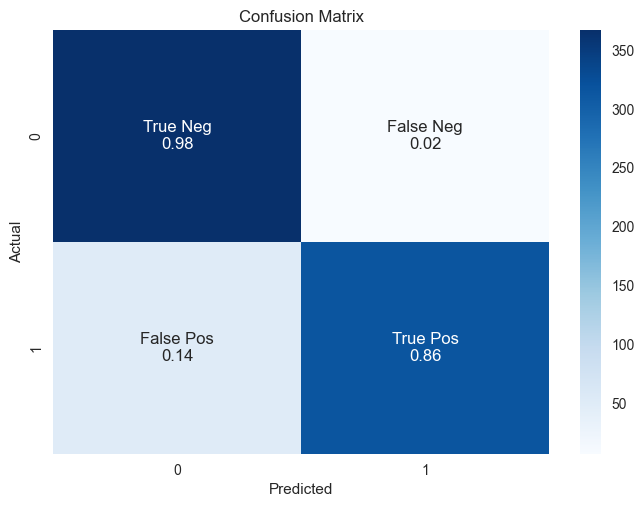

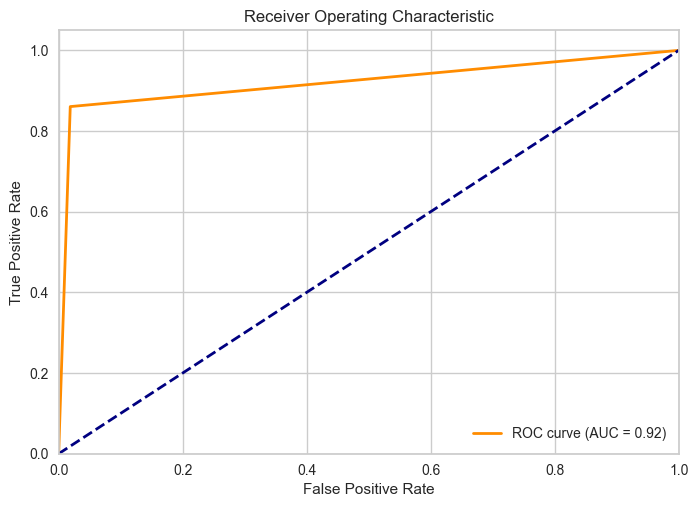

In [467]:
plot_confusion_matrix(y_test, test_predictionKnn)
plot_roc_curve(y_test, test_predictionKnn)

## 3.8 - KNN WITH HYPERPARAMETERS

In [468]:
parametri = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric' : ['minkowski','euclidean','manhattan']
}
grid_search = GridSearchCV(estimator=knn, param_grid=parametri, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Migliori parametri:", grid_search.best_params_)

Migliori parametri: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [469]:
knnPrameter = KNeighborsClassifier(**grid_search.best_params_)
knnPrameter.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [470]:
train_predictionKnnParameter = knnPrameter.predict(X_train)
test_predictionKnnParameter = knnPrameter.predict(X_test)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predictionKnnParameter))
print("Training accuracy:",metrics.accuracy_score(y_train, train_predictionKnnParameter))

Testing accuracy: 0.9094594594594595
Training accuracy: 1.0


In [471]:
print(classification_report(y_test, test_predictionKnnParameter))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       374
           1       0.98      0.84      0.90       366

    accuracy                           0.91       740
   macro avg       0.92      0.91      0.91       740
weighted avg       0.92      0.91      0.91       740



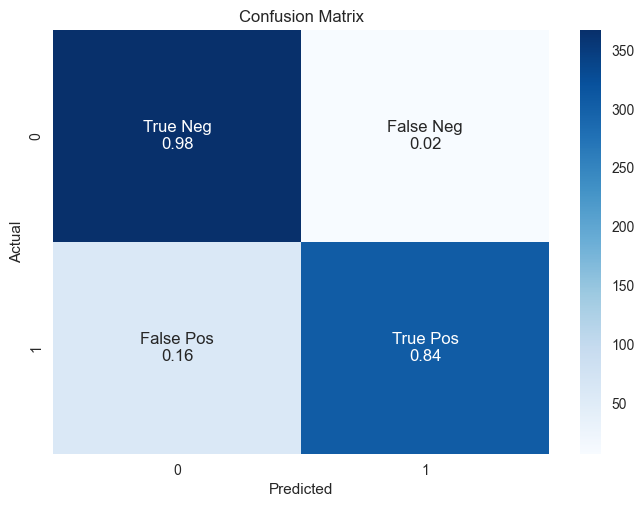

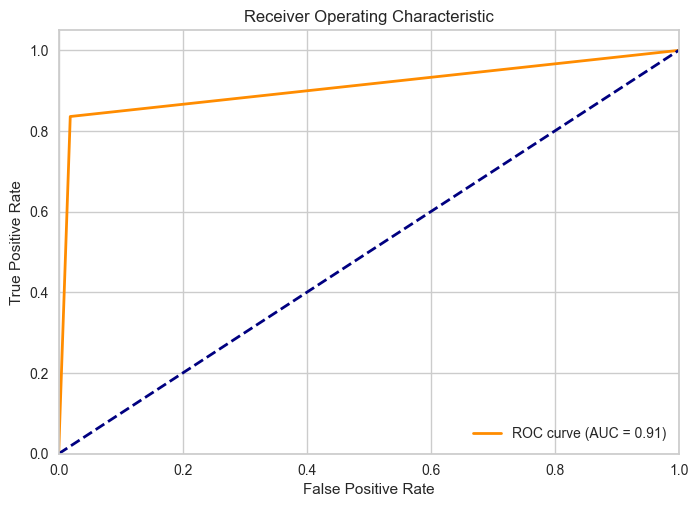

In [472]:
plot_confusion_matrix(y_test, test_predictionKnnParameter)
plot_roc_curve(y_test, test_predictionKnnParameter)

## 3.9 - CHECK SIMILARITY

In [473]:
from scipy.stats import ks_2samp

for feature in X_train.columns:
    stat, p_value = ks_2samp(X_train[feature], X_test[feature])
    print(f"{feature}: KS statistic = {stat:.4f}, p-value = {p_value:.4f}")

Type 1: KS statistic = 0.0357, p-value = 0.5459
Type 2: KS statistic = 0.0457, p-value = 0.2508
Total: KS statistic = 0.0456, p-value = 0.2526
HP: KS statistic = 0.0577, p-value = 0.0737
Attack: KS statistic = 0.0330, p-value = 0.6460
Defense: KS statistic = 0.0543, p-value = 0.1070
Sp. Atk: KS statistic = 0.0386, p-value = 0.4458
Sp. Def: KS statistic = 0.0151, p-value = 0.9998
Speed: KS statistic = 0.0263, p-value = 0.8763
Generation: KS statistic = 0.0420, p-value = 0.3439
Evolution Number: KS statistic = 0.0352, p-value = 0.5663
Final Form: KS statistic = 0.0498, p-value = 0.1695


# 4 - MODELLING: IS THE 2ND EVOLUTION?

In [474]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

evolutionNumber = pokemon['Evolution Number']
X = pokemon.drop(['ID','Name','Evolution Number', 'Form'],axis=1)
y = evolutionNumber == 2


In [475]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34, train_size=0.66, random_state = 7)

In [476]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

## 4.1 - DECISION TREE

In [477]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

decisionTree = DecisionTreeClassifier()
decisionTree = decisionTree.fit(X_train,y_train)

In [478]:
test_predictionDt = decisionTree.predict(X_test)
train_predictionDt = decisionTree.predict(X_train)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predictionDt))
print("Training accuracy:",metrics.accuracy_score(y_train, train_predictionDt))

Testing accuracy: 0.6621621621621622
Training accuracy: 0.9993036211699164


In [479]:
print(classification_report(y_test, test_predictionDt))

              precision    recall  f1-score   support

       False       0.75      0.75      0.75       501
        True       0.48      0.48      0.48       239

    accuracy                           0.66       740
   macro avg       0.61      0.61      0.61       740
weighted avg       0.66      0.66      0.66       740



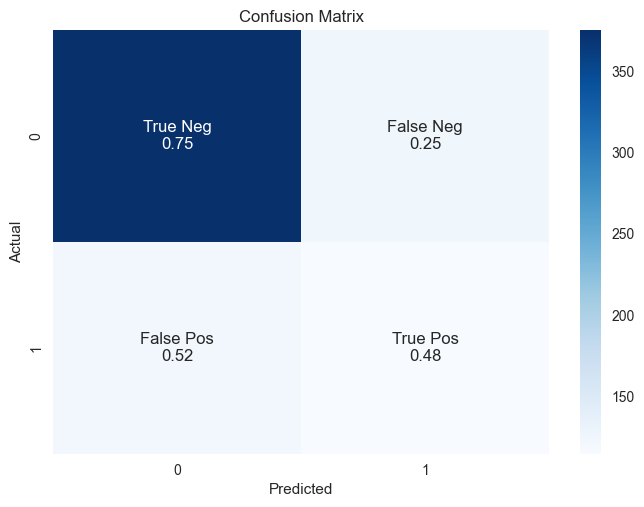

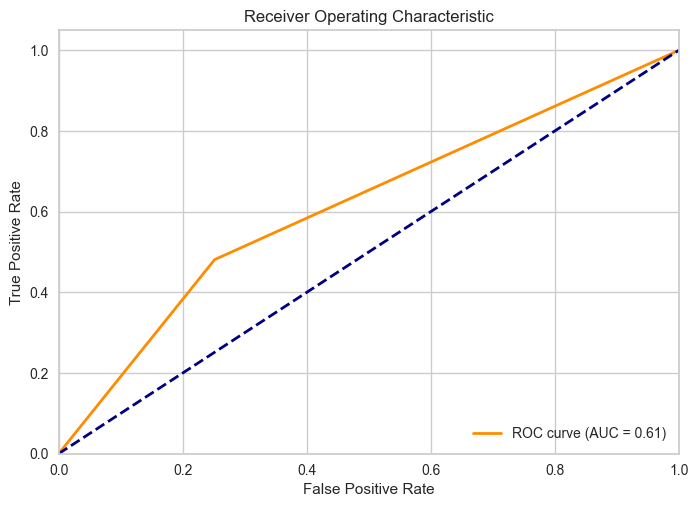

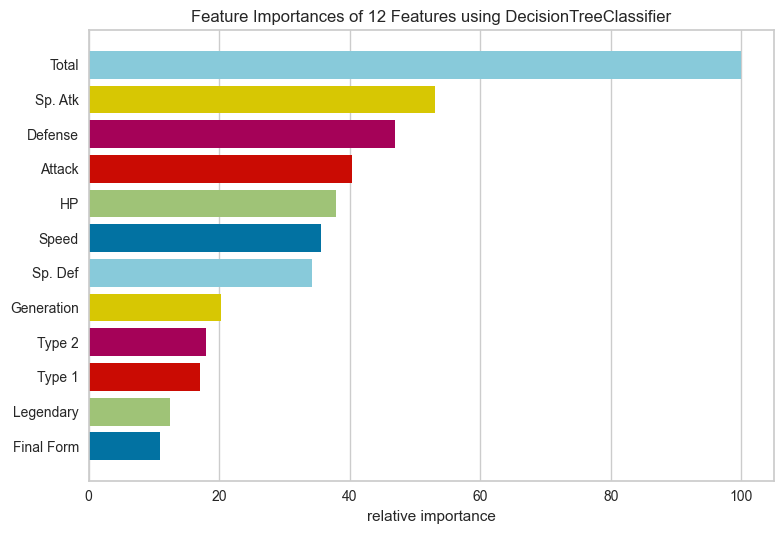

In [480]:
plot_confusion_matrix(y_test, test_predictionDt)
plot_roc_curve(y_test, test_predictionDt)
features_importances(decisionTree,X_test,y_test)

## 4.2 - DECISION TREE WITH HYPERPARAMETERS

In [481]:
parametri = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

decisionTree = decisionTree.fit(X_train,y_train)
grid_search = GridSearchCV(estimator=decisionTree, param_grid=parametri, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Migliori parametri:", grid_search.best_params_)

Migliori parametri: {'criterion': 'log_loss', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [482]:
decisionTreeParameter = DecisionTreeClassifier(**grid_search.best_params_)
decisionTreeParameter = decisionTreeParameter.fit(X_train,y_train)

In [483]:
test_predictionDtP = decisionTreeParameter.predict(X_test)
train_predictionDtP = decisionTreeParameter.predict(X_train)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predictionDtP))
print("Training accuracy:",metrics.accuracy_score(y_train, train_predictionDtP))

Testing accuracy: 0.6621621621621622
Training accuracy: 0.8760445682451253


In [484]:
report = classification_report(y_test, test_predictionDtP)
print(report)

              precision    recall  f1-score   support

       False       0.75      0.74      0.75       501
        True       0.48      0.49      0.48       239

    accuracy                           0.66       740
   macro avg       0.62      0.62      0.62       740
weighted avg       0.66      0.66      0.66       740



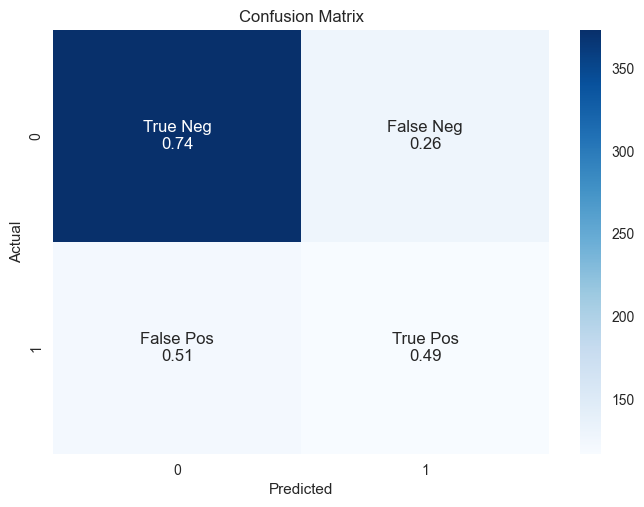

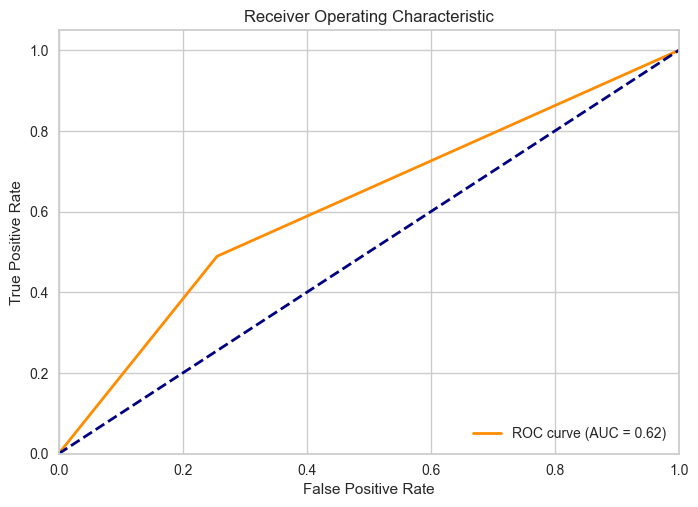

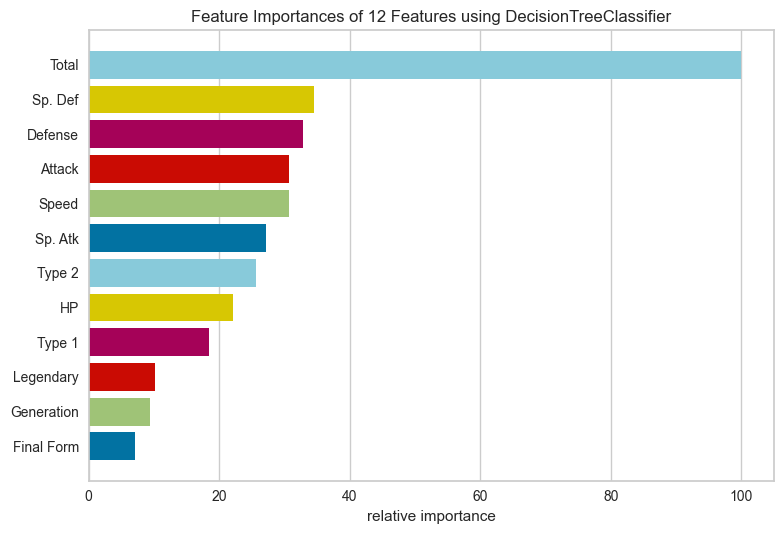

In [485]:
plot_confusion_matrix(y_test, test_predictionDtP)
plot_roc_curve(y_test, test_predictionDtP)
features_importances(decisionTreeParameter,X_test,y_test)

## 4.3 - RANDOM FOREST

In [486]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train,y_train)

In [487]:
test_predictionRf = rfc.predict(X_test)
train_predictionRf = rfc.predict(X_train)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predictionRf))
print("Training accuracy:",metrics.accuracy_score(y_train, train_predictionRf))

Testing accuracy: 0.7405405405405405
Training accuracy: 0.9993036211699164


In [488]:
print(classification_report(y_test, test_predictionRf))

              precision    recall  f1-score   support

       False       0.77      0.89      0.82       501
        True       0.65      0.43      0.52       239

    accuracy                           0.74       740
   macro avg       0.71      0.66      0.67       740
weighted avg       0.73      0.74      0.72       740



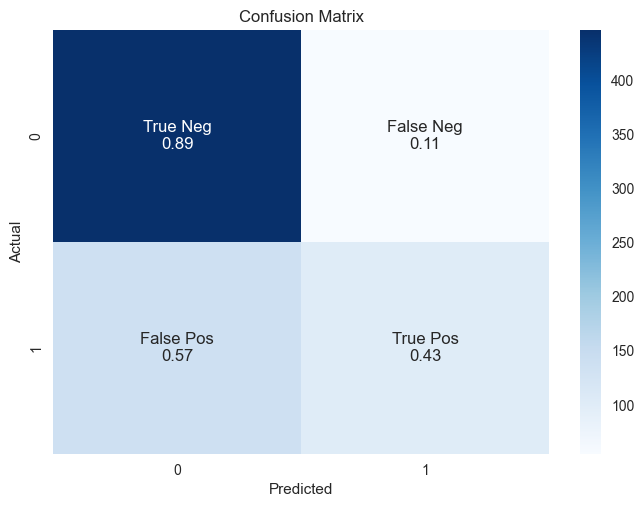

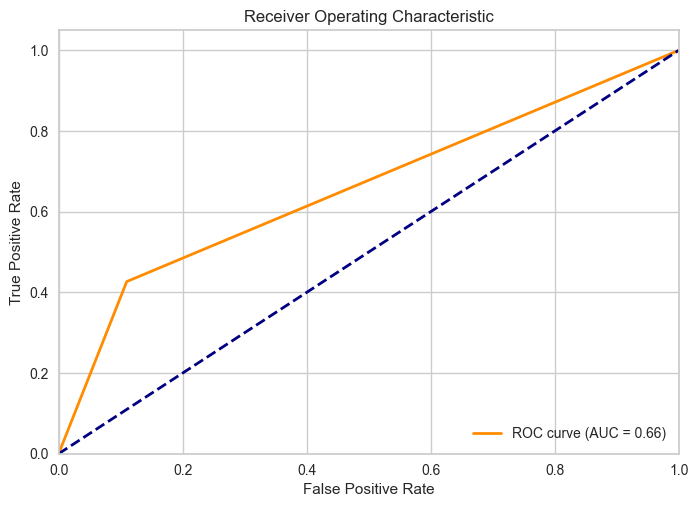

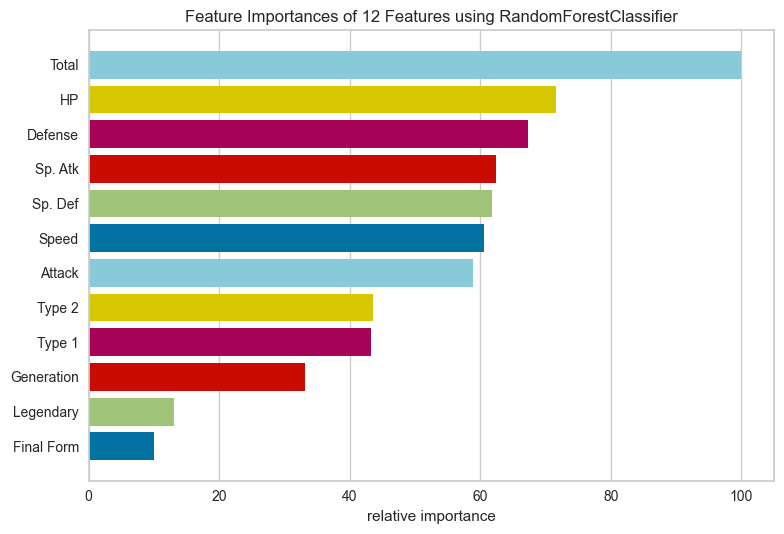

In [489]:
plot_confusion_matrix(y_test, test_predictionRf)
plot_roc_curve(y_test, test_predictionRf)
features_importances(rfc,X_test,y_test)

## 4.4 - RANDOM FOREST WITH HYPERPARAMETERS

In [490]:
#lentissimo
parametri = {
  'n_estimators': [50, 70, 80],
  'max_features': ['sqrt', 'log2', None],
  'max_depth': [10, 30, None],
  'min_samples_split': [1, 2, 4],
  'min_samples_leaf': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=rfc, param_grid=parametri, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Migliori parametri:", grid_search.best_params_)

Migliori parametri: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 80}


In [491]:
rfcParameter = RandomForestClassifier(**grid_search.best_params_)
rfcParameter.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=80)

In [492]:
test_predictionRfP = rfcParameter.predict(X_test)
train_predictionRfP = rfcParameter.predict(X_train)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predictionRfP))
print("Training accuracy:",metrics.accuracy_score(y_train, train_predictionRfP))

Testing accuracy: 0.7337837837837838
Training accuracy: 0.8600278551532033


In [493]:
print(classification_report(y_test, test_predictionRfP))

              precision    recall  f1-score   support

       False       0.76      0.89      0.82       501
        True       0.64      0.41      0.50       239

    accuracy                           0.73       740
   macro avg       0.70      0.65      0.66       740
weighted avg       0.72      0.73      0.72       740



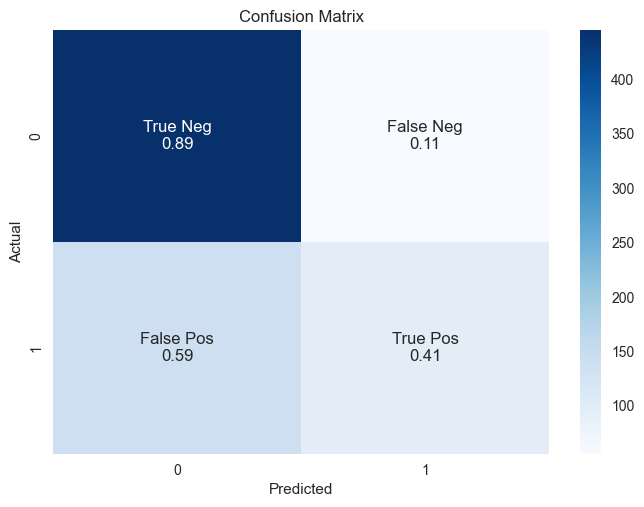

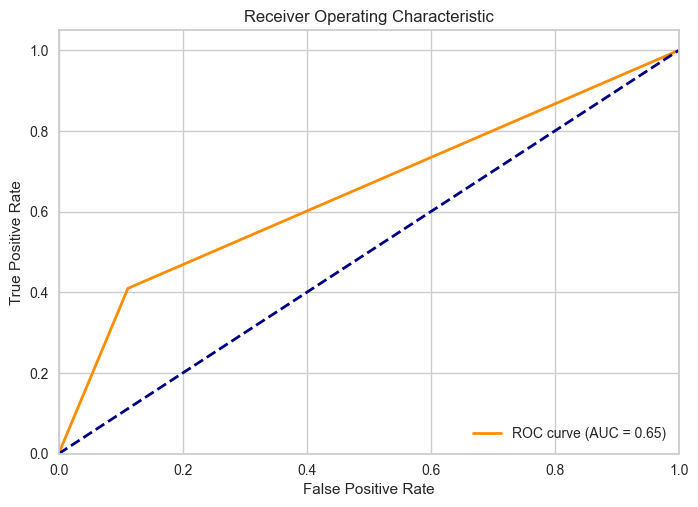

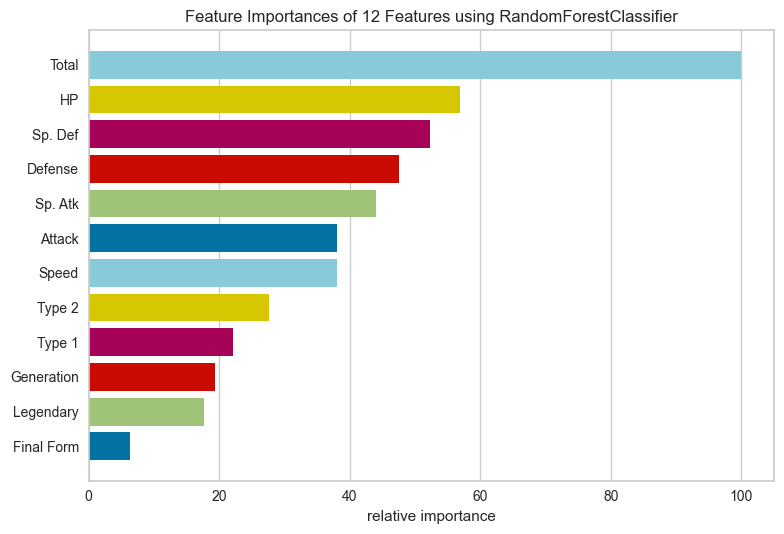

In [494]:
plot_confusion_matrix(y_test, test_predictionRfP)
plot_roc_curve(y_test, test_predictionRfP)
features_importances(rfcParameter,X_test,y_test)

## 4.5 - LOGISTIC REGRESSION

In [495]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [496]:
test_predictionLr = lr.predict(X_test)
train_predictionLr = lr.predict(X_train)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predictionLr))
print("Training accuracy:",metrics.accuracy_score(y_train, train_predictionLr))

Testing accuracy: 0.6635135135135135
Training accuracy: 0.6385793871866295


In [497]:
print(classification_report(y_test, test_predictionLr))

              precision    recall  f1-score   support

       False       0.68      0.96      0.80       501
        True       0.31      0.03      0.06       239

    accuracy                           0.66       740
   macro avg       0.49      0.50      0.43       740
weighted avg       0.56      0.66      0.56       740



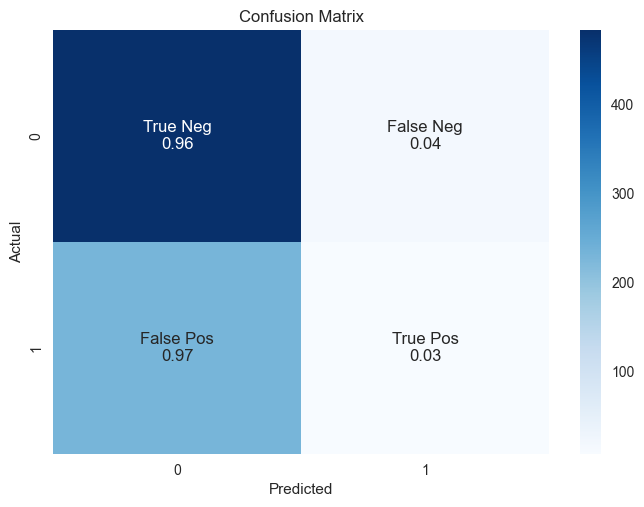

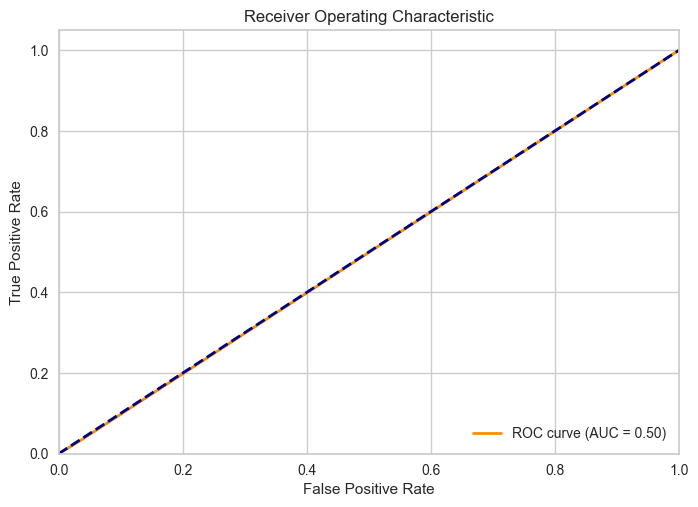

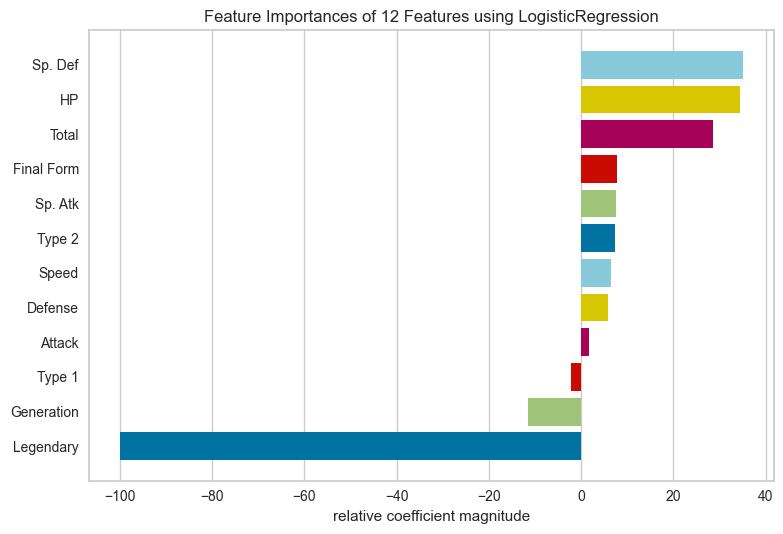

In [498]:
plot_confusion_matrix(y_test, test_predictionLr)
plot_roc_curve(y_test, test_predictionLr)
features_importances(lr,X_test,y_test)

## 4.6 - LOGISTIC REGRESSION WITH HYPERPARAMETERS

In [499]:
parametri = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga'],
    'C': [0.1, 0.5, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]
}

grid_search = GridSearchCV(estimator=lr, param_grid=parametri, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Migliori parametri:", grid_search.best_params_)

Migliori parametri: {'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'saga'}


In [500]:
lrParameter = LogisticRegression(**grid_search.best_params_)
lrParameter.fit(X_train,y_train)

LogisticRegression(C=0.1, l1_ratio=0.1, penalty='l1', solver='saga')

In [501]:
test_predictionLrP = lrParameter.predict(X_test)
train_predictionLrP = lrParameter.predict(X_train)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predictionLrP))
print("Training accuracy:",metrics.accuracy_score(y_train, train_predictionLrP))

Testing accuracy: 0.6756756756756757
Training accuracy: 0.6448467966573816


In [502]:
print(classification_report(y_test, test_predictionLrP))

              precision    recall  f1-score   support

       False       0.68      0.99      0.81       501
        True       0.40      0.01      0.02       239

    accuracy                           0.68       740
   macro avg       0.54      0.50      0.41       740
weighted avg       0.59      0.68      0.55       740



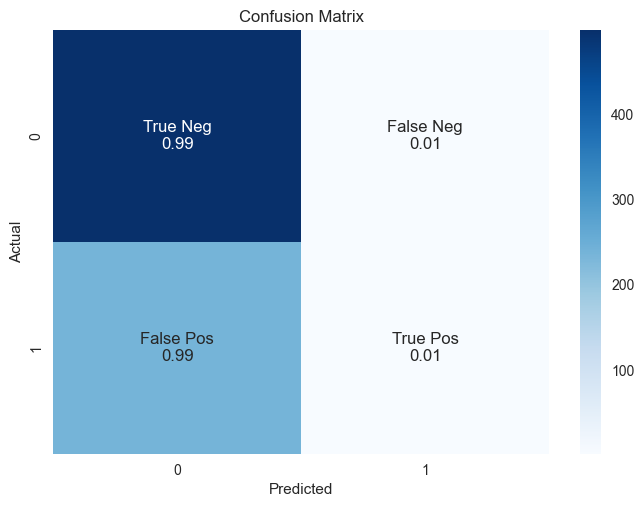

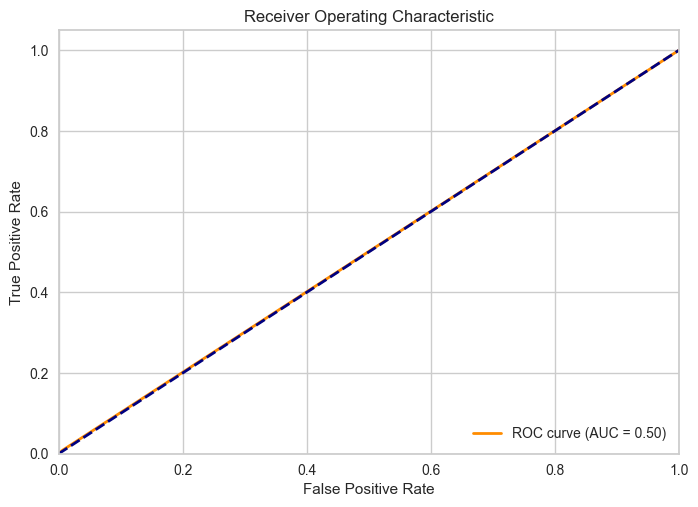

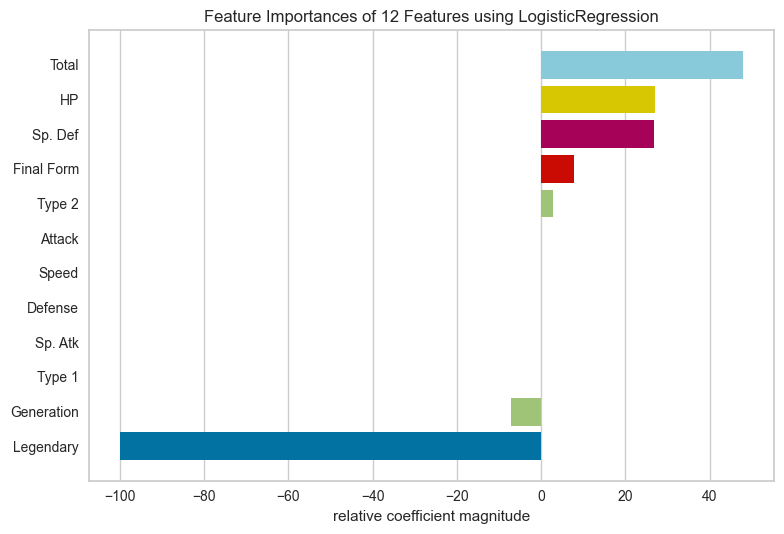

In [503]:
plot_confusion_matrix(y_test, test_predictionLrP)
plot_roc_curve(y_test, test_predictionLrP)
features_importances(lrParameter,X_test,y_test)

## 4.7 - KNN

In [504]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [505]:
train_predictionKnn = knn.predict(X_train)
test_predictionKnn = knn.predict(X_test)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predictionKnn))
print("Training accuracy:",metrics.accuracy_score(y_train, train_predictionKnn))

Testing accuracy: 0.6797297297297298
Training accuracy: 0.7583565459610028


In [506]:
print(classification_report(y_test, test_predictionKnn))

              precision    recall  f1-score   support

       False       0.74      0.80      0.77       501
        True       0.51      0.42      0.46       239

    accuracy                           0.68       740
   macro avg       0.62      0.61      0.62       740
weighted avg       0.67      0.68      0.67       740



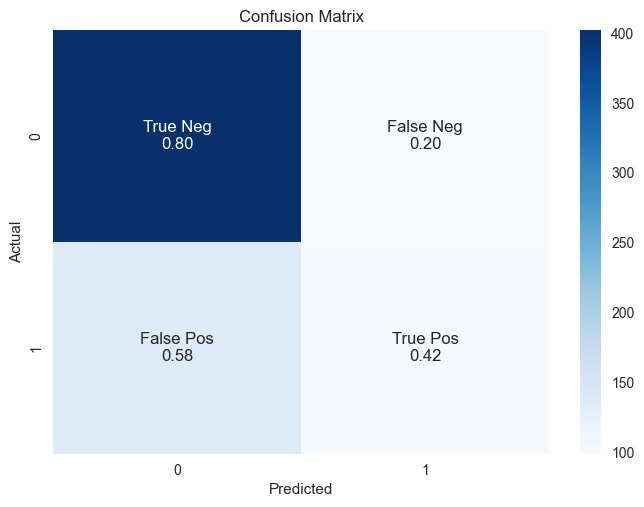

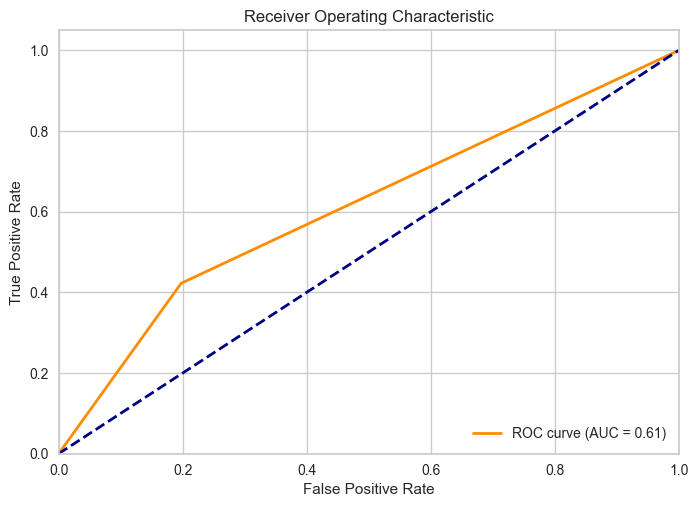

In [507]:
plot_confusion_matrix(y_test, test_predictionKnn)
plot_roc_curve(y_test, test_predictionKnn)

## 4.8 - KNN WITH HYPERPARAMETERS

In [508]:
parametri = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric' : ['minkowski','euclidean','manhattan']
}
grid_search = GridSearchCV(estimator=knn, param_grid=parametri, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Migliori parametri:", grid_search.best_params_)

Migliori parametri: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [509]:
knnPrameter = KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')
knnPrameter.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [510]:
train_predictionKnnParameter = knnPrameter.predict(X_train)
test_predictionKnnParameter = knnPrameter.predict(X_test)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predictionKnnParameter))
print("Training accuracy:",metrics.accuracy_score(y_train, train_predictionKnnParameter))

Testing accuracy: 0.7
Training accuracy: 0.9993036211699164


In [511]:
print(classification_report(y_test, test_predictionKnnParameter))

              precision    recall  f1-score   support

       False       0.76      0.81      0.78       501
        True       0.54      0.48      0.51       239

    accuracy                           0.70       740
   macro avg       0.65      0.64      0.65       740
weighted avg       0.69      0.70      0.69       740



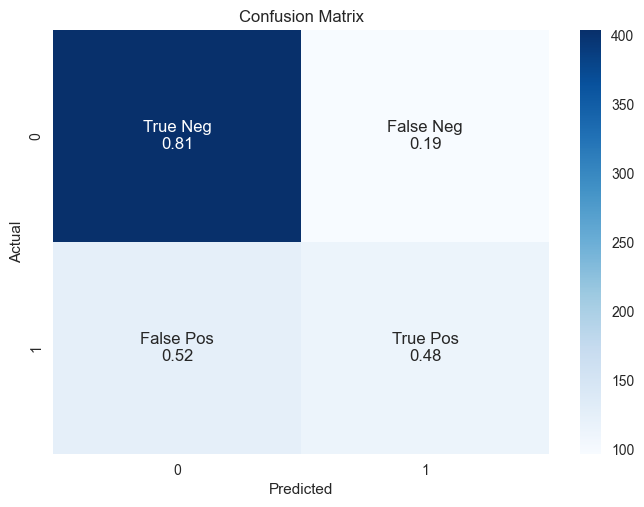

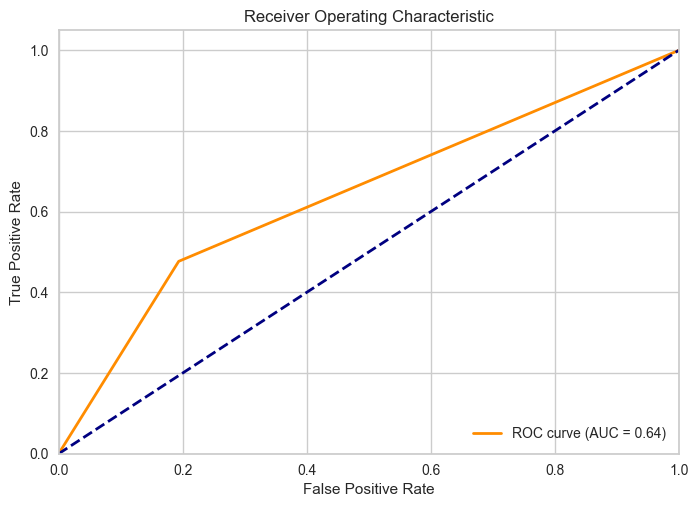

In [512]:
plot_confusion_matrix(y_test, test_predictionKnnParameter)
plot_roc_curve(y_test, test_predictionKnnParameter)

## 4.9 - CHECK SIMILARITY

In [513]:
from scipy.stats import ks_2samp

for feature in X_train.columns:
    stat, p_value = ks_2samp(X_train[feature], X_test[feature])
    print(f"{feature}: KS statistic = {stat:.4f}, p-value = {p_value:.4f}")

Type 1: KS statistic = 0.0357, p-value = 0.5459
Type 2: KS statistic = 0.0457, p-value = 0.2508
Total: KS statistic = 0.0456, p-value = 0.2526
HP: KS statistic = 0.0577, p-value = 0.0737
Attack: KS statistic = 0.0330, p-value = 0.6460
Defense: KS statistic = 0.0543, p-value = 0.1070
Sp. Atk: KS statistic = 0.0386, p-value = 0.4458
Sp. Def: KS statistic = 0.0151, p-value = 0.9998
Speed: KS statistic = 0.0263, p-value = 0.8763
Generation: KS statistic = 0.0420, p-value = 0.3439
Legendary: KS statistic = 0.0082, p-value = 1.0000
Final Form: KS statistic = 0.0498, p-value = 0.1695
